## Introduction
Greetings from the Kaggle bot! This is an automatically-generated kernel with starter code demonstrating how to read in the data and begin exploring. If you're inspired to dig deeper, click the blue "Fork Notebook" button at the top of this kernel to begin editing.

## Exploratory Analysis
To begin this exploratory analysis, first import libraries and define functions for plotting the data using `matplotlib`. Depending on the data, not all plots will be made. (Hey, I'm just a simple kerneling bot, not a Kaggle Competitions Grandmaster!)

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


import warnings
warnings.filterwarnings('ignore')



There are 4 csv files in the current version of the dataset:


In [4]:
for dirname, _, filenames in os.walk('../HAI'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../HAI\Anamoly_rows.csv
../HAI\mlp.py
../HAI\Project_source_code_KDD.ipynb
../HAI\starter-hai-security-dataset-7355467a-2 (1).ipynb
../HAI\test1.csv
../HAI\test2.csv
../HAI\test3.csv
../HAI\test4.csv
../HAI\testing_target.csv
../HAI\train1.csv
../HAI\train2.csv
../HAI\train3.csv
../HAI\train4.csv
../HAI\train5.csv
../HAI\train6.csv
../HAI\y_pred.csv
../HAI\.ipynb_checkpoints\Project_source_code_KDD-checkpoint.ipynb
../HAI\.ipynb_checkpoints\starter-hai-security-dataset-7355467a-2 (1)-checkpoint.ipynb


The next hidden code cells define functions for plotting data. Click on the "Code" button in the published kernel to reveal the hidden code.

In [5]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(int(nGraphRow), int(nGraphPerRow), i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [6]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna() # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [7]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.iloc[0:1001, :]
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna()
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


Now you're ready to read in the data and use the plotting functions to visualize the data.

### Let's check 1st file: ../HAI/train1.csv

In [8]:
nRowsRead = None # specify 'None' if want to read whole file
# normal_20191101T200000_to_20191104T150000.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('../HAI/train1.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'train1.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 93601 rows and 88 columns


Let's take a quick look at what the data looks like:

In [9]:
df1.head(5)

timestamp  P1_B2004  P1_B2016   P1_B3004    P1_B3005  P1_B4002  \
0  2021-07-11 10:00:00   0.08771   0.88504  476.76703  1014.79321  26.92264   
1  2021-07-11 10:00:01   0.08771   0.88619  476.76703  1014.79321  26.92264   
2  2021-07-11 10:00:02   0.08771   0.88836  476.76703  1014.79321  26.92264   
3  2021-07-11 10:00:03   0.08771   0.89214  476.76703  1014.79321  26.92264   
4  2021-07-11 10:00:04   0.08771   0.89191  476.76703  1014.79321  26.92264   

   P1_B4005   P1_B400B  P1_B4022  P1_FCV01D  ...  P4_HT_PS      P4_LD  \
0  15.07713  595.06104  30.08042   15.50464  ...   7.08818  276.40338   
1  14.97197  531.50317  30.08423   16.20023  ...   7.08818  276.18634   
2  14.90129  451.06253  30.09148   16.53352  ...   7.08818  279.85754   
3  14.82246  404.38739  30.10407   16.30247  ...   7.08818  281.50317   
4  14.73087  382.53925  30.10331   15.79237  ...   7.08818  281.34039   

   P4_ST_FD  P4_ST_GOV   P4_ST_LD   P4_ST_PO  P4_ST_PS  P4_ST_PT01  \
0  -0.00087      14742  276.45758  267.90363   8.90254        9914   
1   0.00058      14781  278.91705  268.95258   8.90254        9914   
2  -0.00072      14831  278.89899  269.76636   8.90254        9914   
3   0.00101      14917  280.49048  271.64716   8.90254        9914   
4   0.00043      14997  283.47437  272.80457   8.90254        9914   

   P4_ST_TT01  Attack  
0       27170       0  
1       27171       0  
2       27170       0  
3       27171       0  
4       27171       0  

[5 rows x 88 columns]

Distribution graphs (histogram/bar graph) of sampled columns:

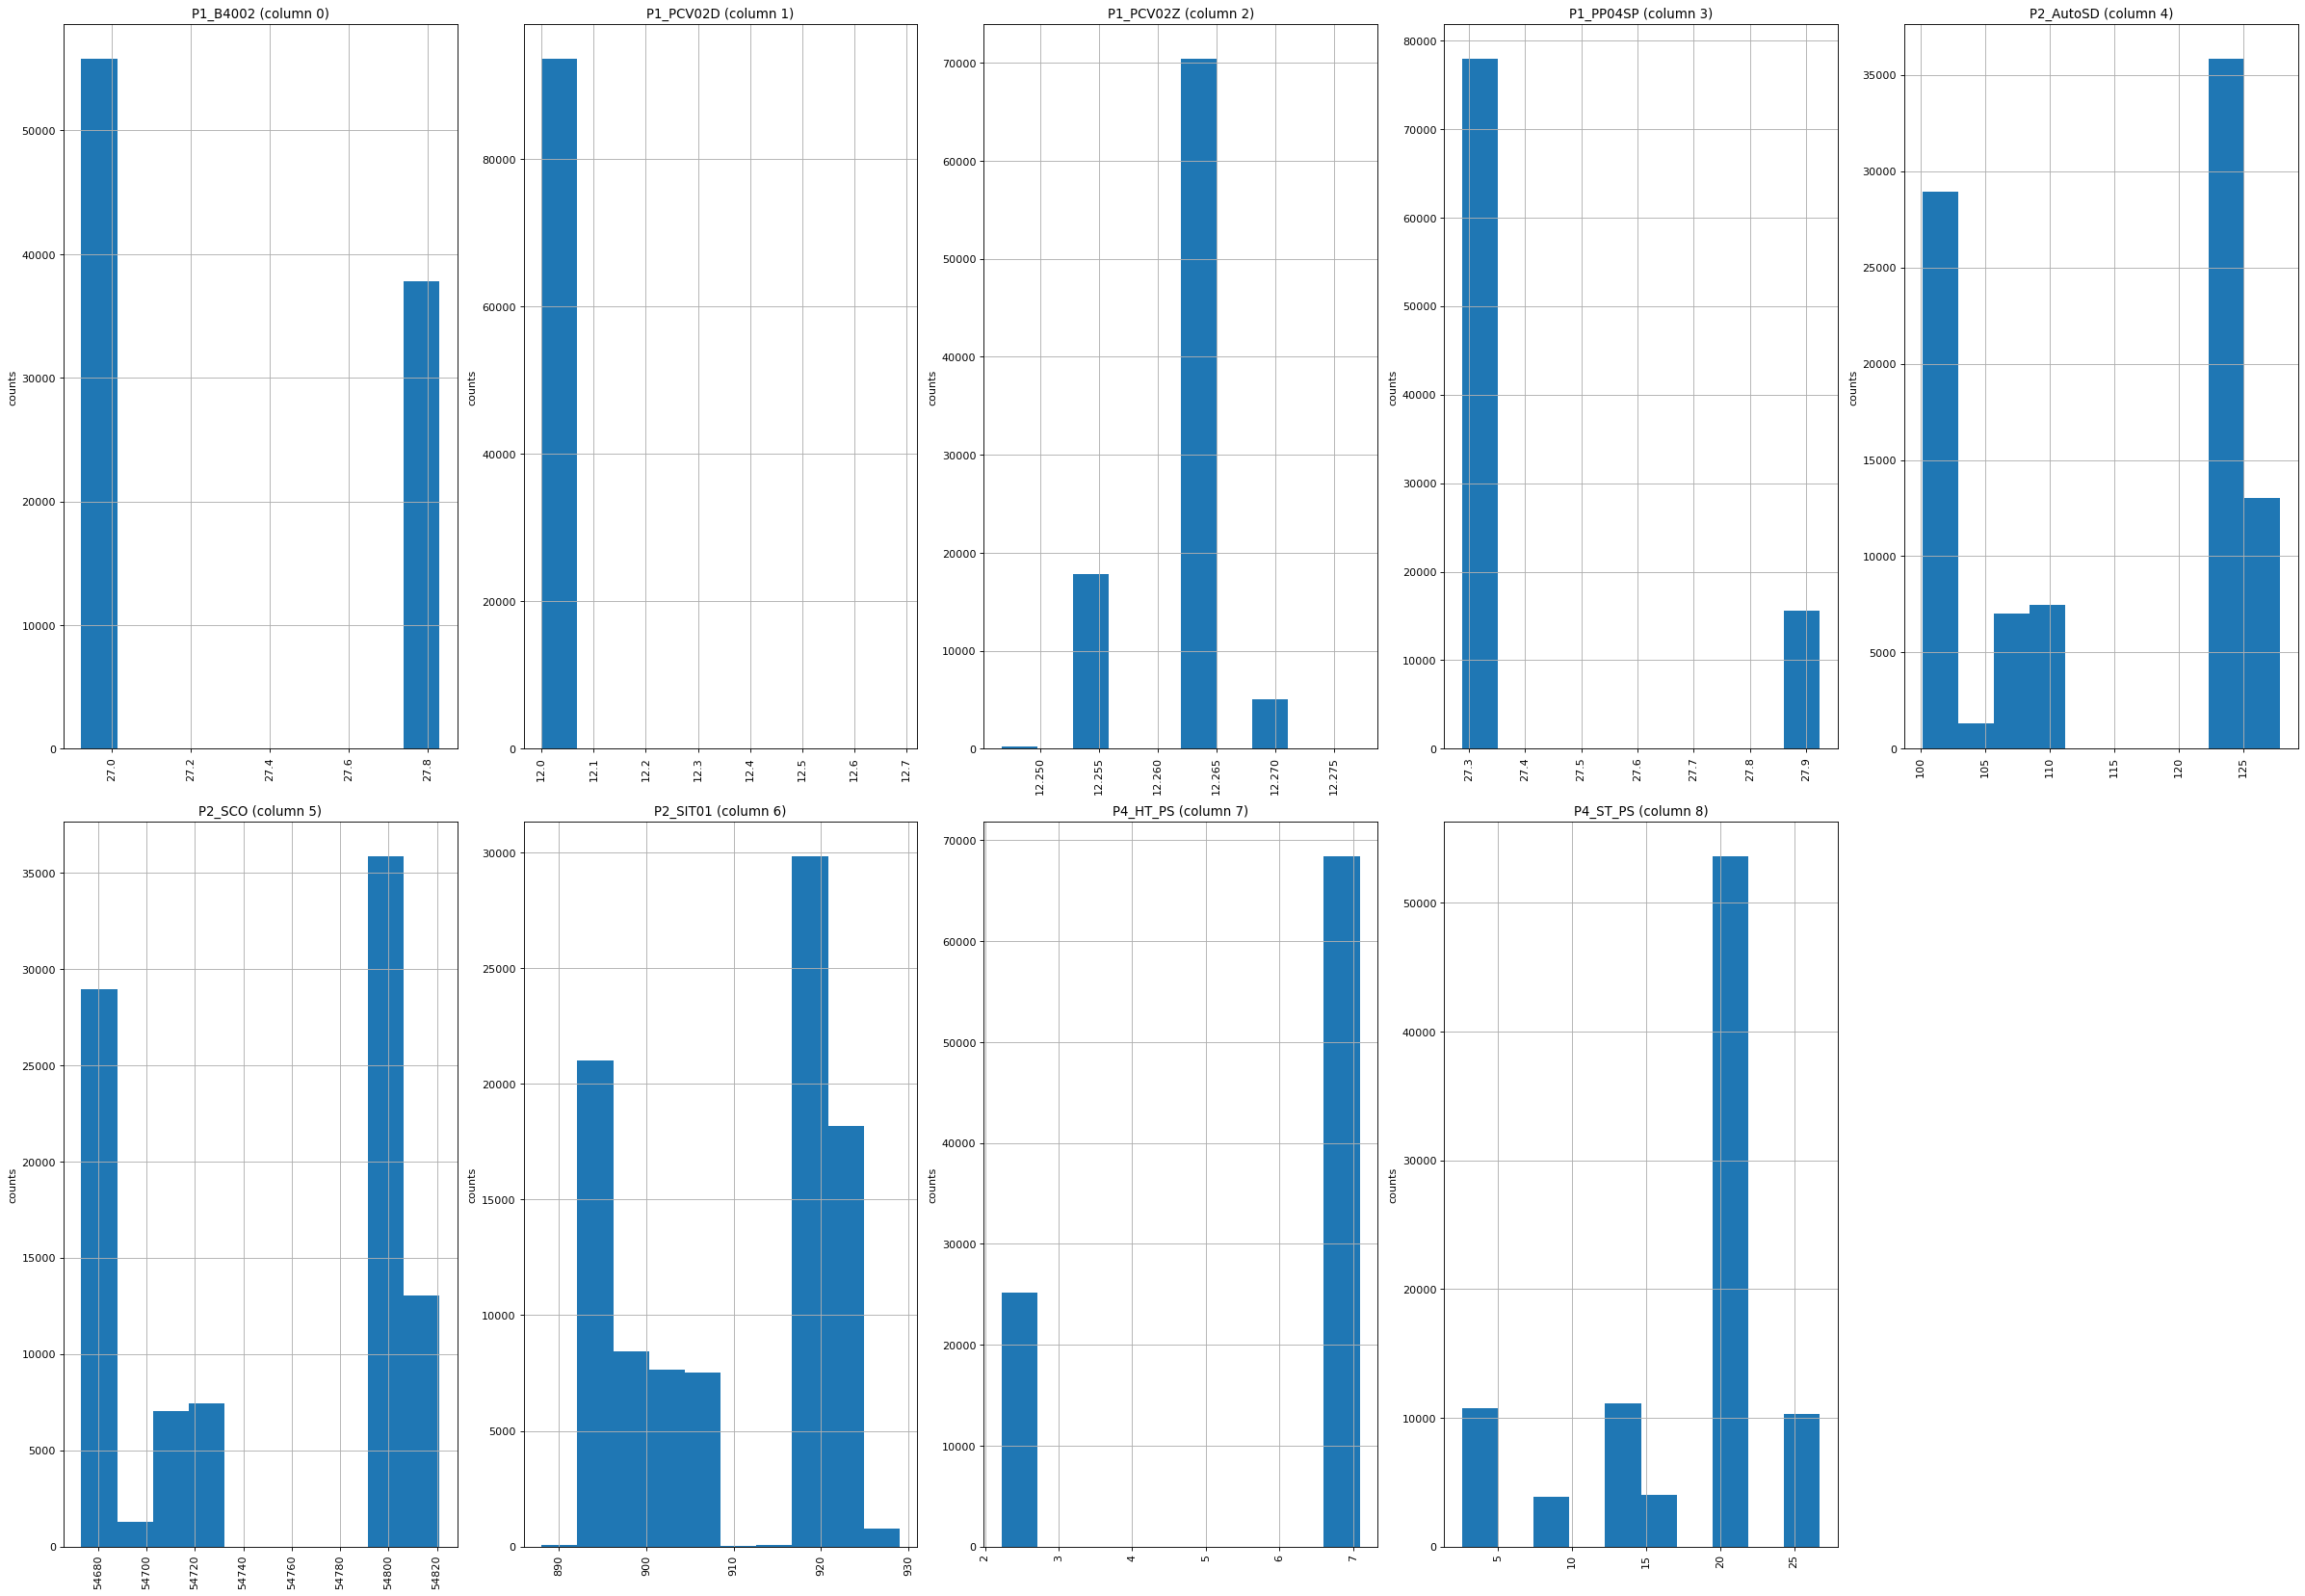

In [10]:
plotPerColumnDistribution(df1, 10, 5)

Correlation matrix:

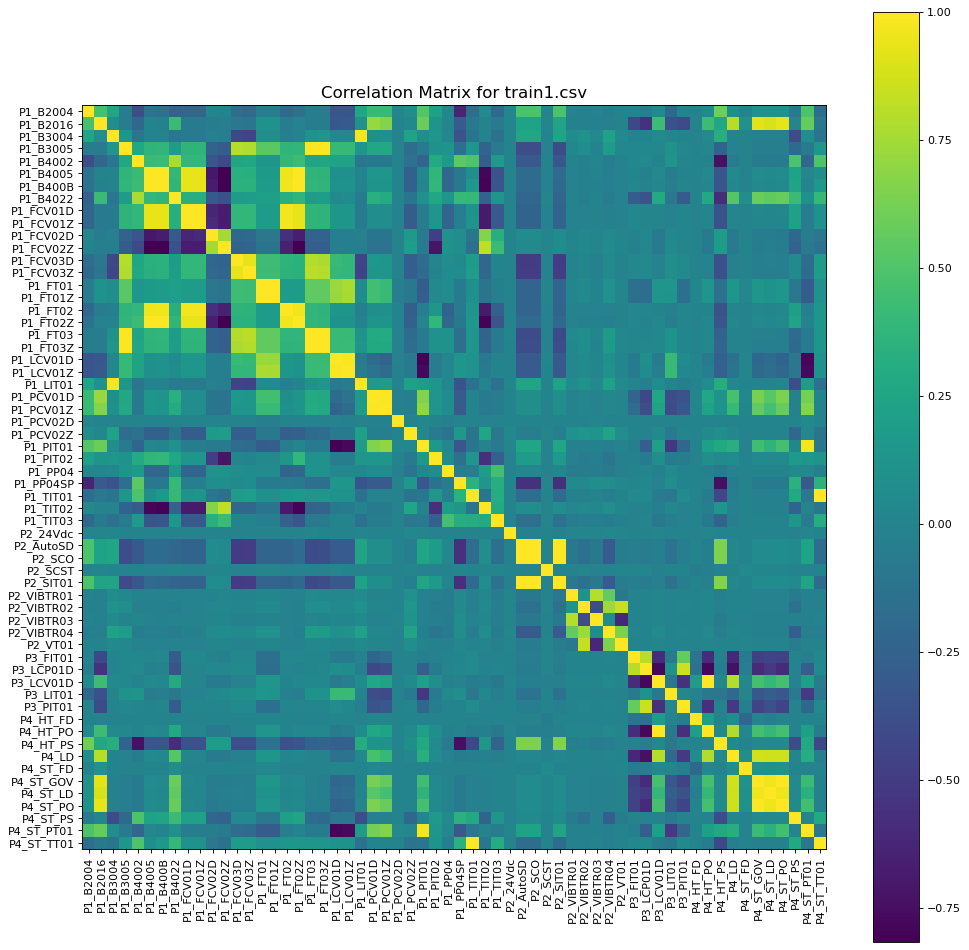

In [11]:
plotCorrelationMatrix(df1, 15)

Scatter and density plots:

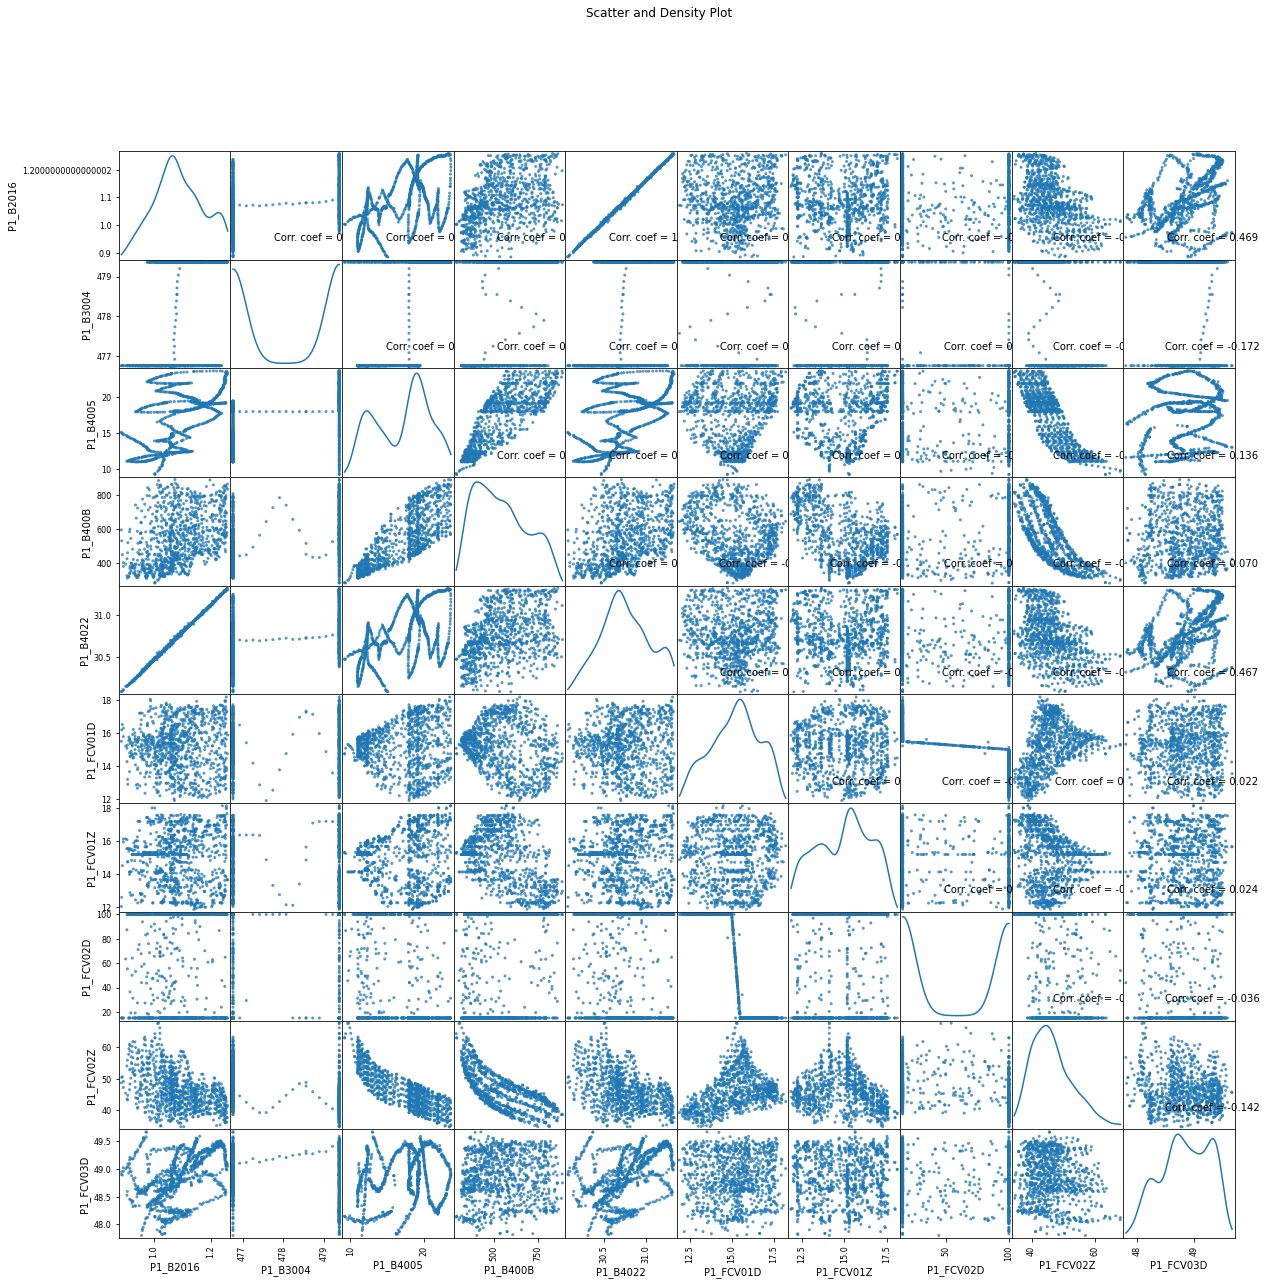

In [12]:
plotScatterMatrix(df1, 20, 10)

### Let's check 2nd file: ../HAI/train2.csv

In [13]:
nRowsRead = None # specify 'None' if want to read whole file
# abnormal_20191029T110000_to_20191101T200000.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv('../HAI/train2.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'train2.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 201600 rows and 88 columns


Let's take a quick look at what the data looks like:

In [14]:
df2.head(5)

timestamp  P1_B2004  P1_B2016   P1_B3004    P1_B3005  P1_B4002  \
0  2021-07-17 00:00:01   0.06944   1.04095  467.03854  1015.06964  25.68717   
1  2021-07-17 00:00:02   0.06944   1.04507  467.03854  1015.06964  25.68717   
2  2021-07-17 00:00:03   0.06944   1.04118  467.03854  1015.06964  25.68717   
3  2021-07-17 00:00:04   0.06944   1.04233  467.03854  1015.06964  25.68717   
4  2021-07-17 00:00:05   0.06944   1.04610  467.03854  1015.06964  25.68717   

   P1_B4005   P1_B400B  P1_B4022  P1_FCV01D  ...  P4_HT_PS      P4_LD  \
0  30.11582  839.60724  29.42554   17.36107  ...   2.40398  379.86475   
1  30.17760  842.21661  29.43927   16.71128  ...   2.40398  381.31146   
2  30.19668  887.87848  29.42630   15.99215  ...   2.40398  384.56671   
3  30.23056  935.71472  29.43012   15.19055  ...   2.40398  386.86340   
4  30.30456  988.33459  29.43012   15.19055  ...   2.40398  387.20703   

   P4_ST_FD  P4_ST_GOV   P4_ST_LD   P4_ST_PO  P4_ST_PS  P4_ST_PT01  \
0  -0.00231      17928  319.19128  325.17725  26.76094        9916   
1  -0.00014      17877  321.18060  325.14105  26.76094        9916   
2   0.00051      17914  322.04858  325.66553  26.76094        9917   
3  -0.00145      17982  324.63464  326.28033  26.76094        9916   
4  -0.00268      17967  324.12836  326.11761  26.76094        9916   

   P4_ST_TT01  Attack  
0       26971       0  
1       26967       0  
2       26972       0  
3       26975       0  
4       26971       0  

[5 rows x 88 columns]

Distribution graphs (histogram/bar graph) of sampled columns:

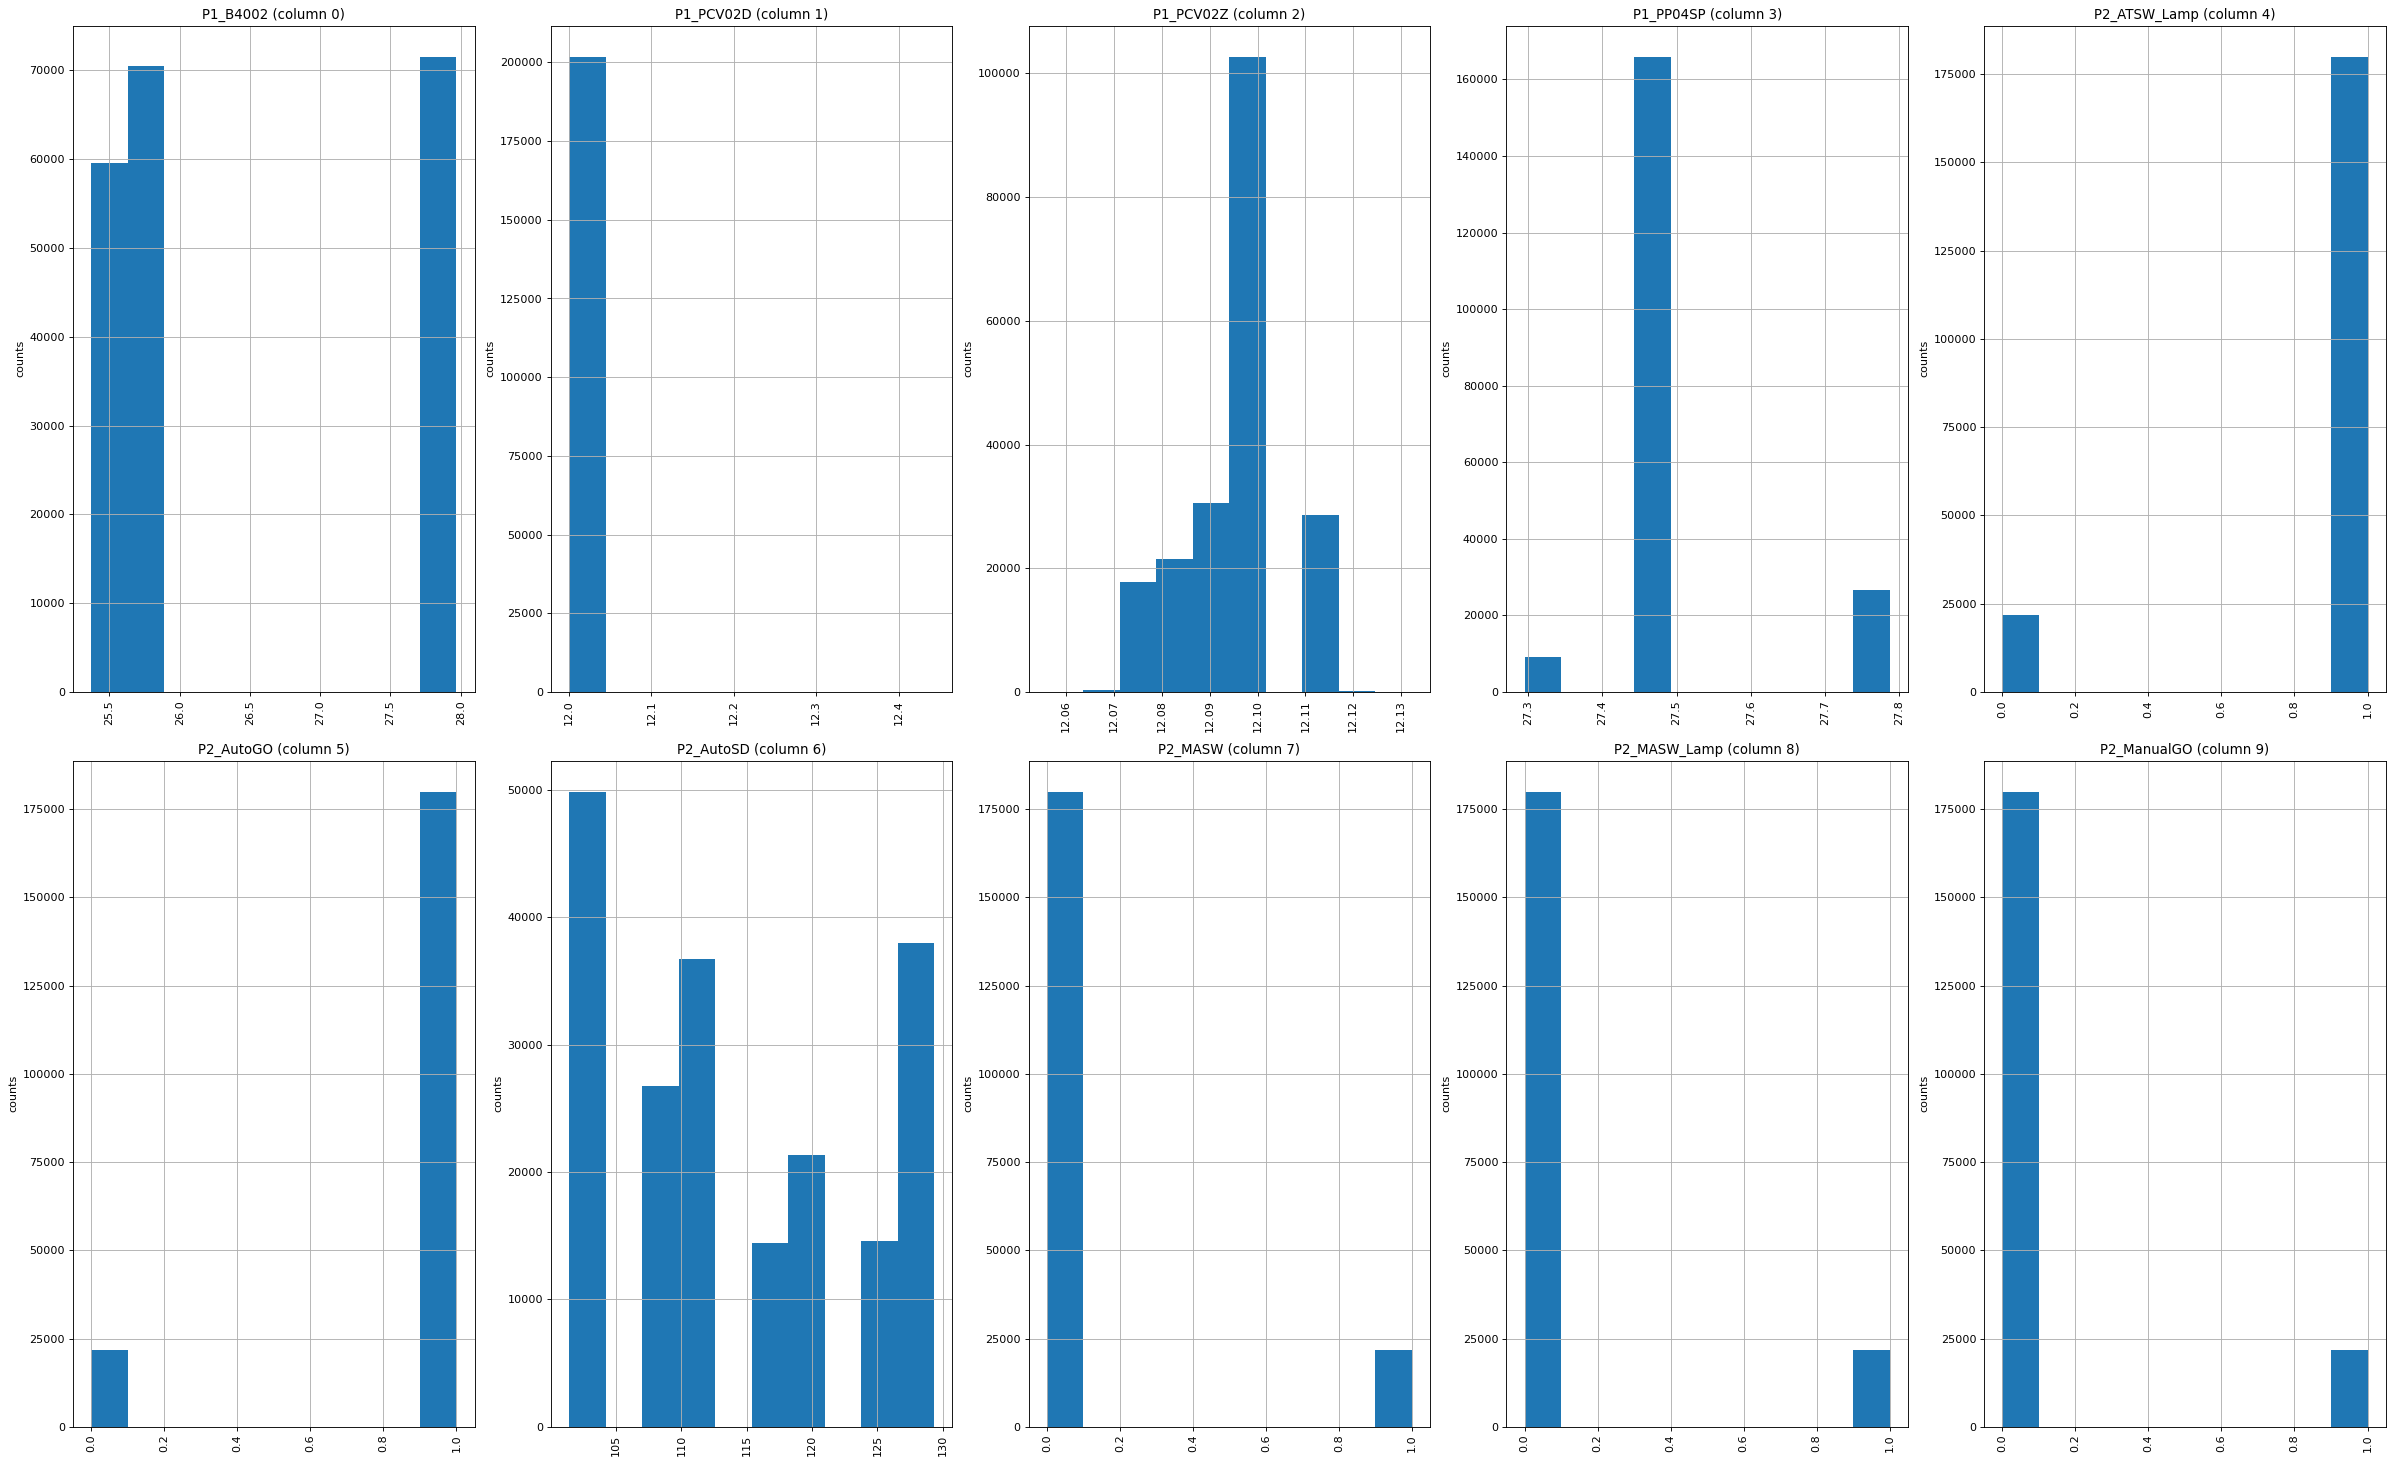

In [15]:
plotPerColumnDistribution(df2, 10, 5)

Correlation matrix:

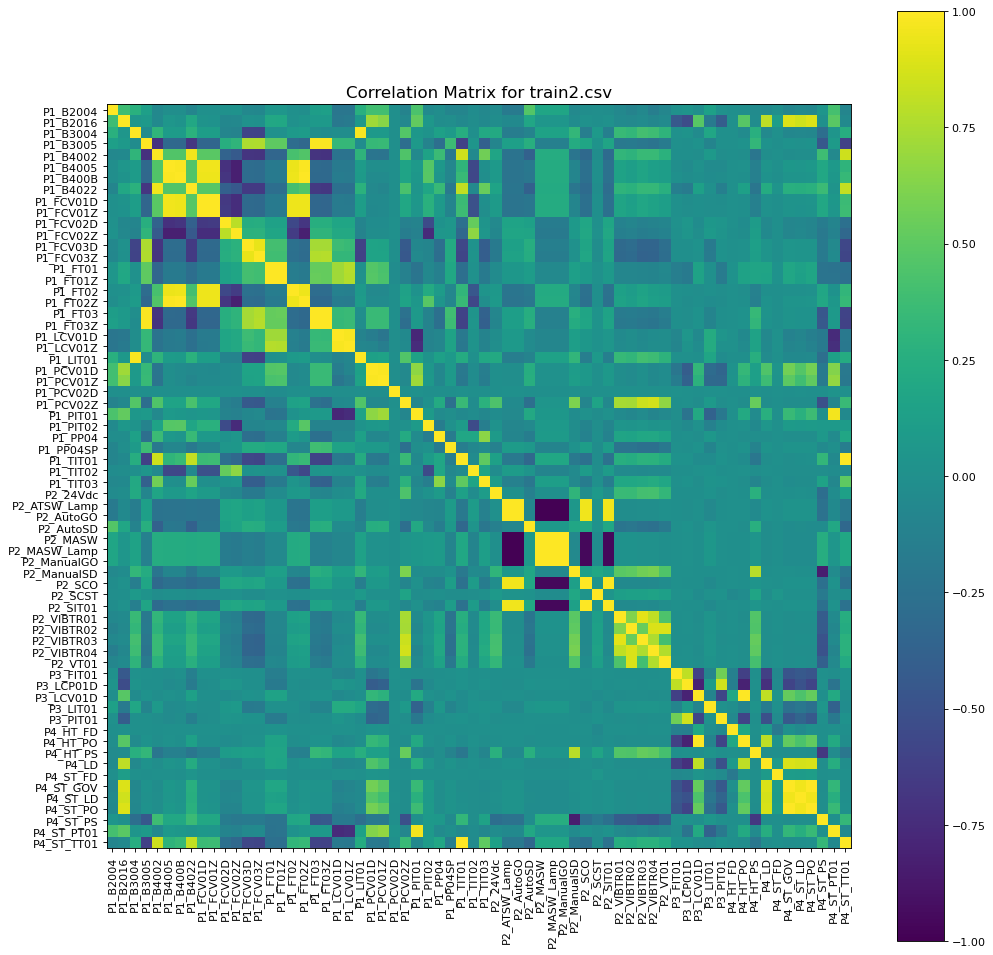

In [16]:
plotCorrelationMatrix(df2, 15)

Scatter and density plots:

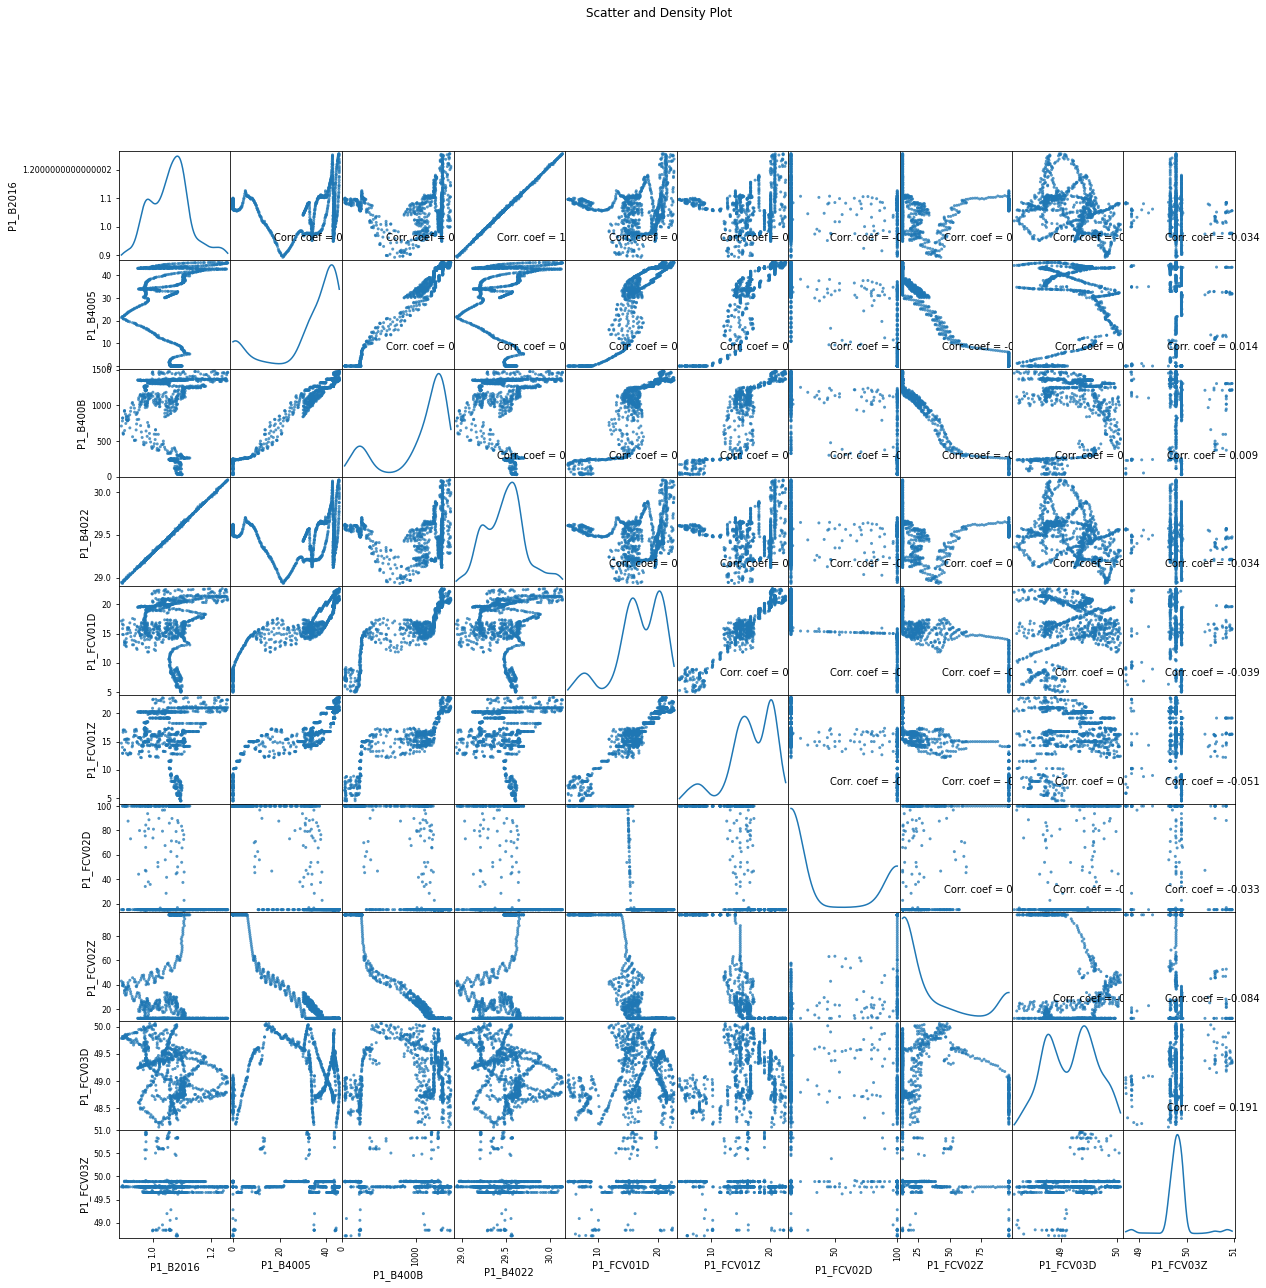

In [17]:
plotScatterMatrix(df2, 20, 10)

### Let's check 3rd file: ../HAI/train3.csv

In [18]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# normal_20190911T200000_to_20190915T100000.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df3 = pd.read_csv('../HAI/train3.csv', delimiter=',', nrows = nRowsRead)
df3.dataframeName = 'train3.csv'
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 88 columns


Let's take a quick look at what the data looks like:

In [19]:
df3.head(5)

timestamp  P1_B2004  P1_B2016   P1_B3004  P1_B3005  P1_B4002  \
0  2021-07-23 18:00:01   0.14126   1.24484  432.35583  964.3338        27   
1  2021-07-23 18:00:02   0.14126   1.24484  432.35583  964.3338        27   
2  2021-07-23 18:00:03   0.14126   1.24976  432.35583  964.3338        27   
3  2021-07-23 18:00:04   0.14126   1.24965  432.35583  964.3338        27   
4  2021-07-23 18:00:05   0.14126   1.24884  432.35583  964.3338        27   

   P1_B4005    P1_B400B  P1_B4022  P1_FCV01D  ...  P4_HT_PS      P4_LD  \
0  99.52323  3145.70679  31.17859   63.45938  ...   0.07996  449.38153   
1  99.52323  3145.70679  31.17859   63.47993  ...   0.07996  450.90063   
2  99.52354  3137.94897  31.19499   63.46242  ...   0.07996  448.83893   
3  99.50787  3136.69800  31.19461   63.41857  ...   0.07996  450.43042   
4  99.45772  3138.57471  31.19194   63.39355  ...   0.07996  447.97095   

   P4_ST_FD  P4_ST_GOV   P4_ST_LD   P4_ST_PO  P4_ST_PS  P4_ST_PT01  \
0  -0.00109      20342  374.51172  374.81915  12.34726       10026   
1  -0.00383      20414  374.89154  375.03619  12.34726       10026   
2   0.00022      20372  372.32349  374.94574  12.34726       10026   
3  -0.00116      20380  374.20428  375.09039  12.34726       10026   
4   0.00094      20343  372.92029  374.76489  12.34726       10026   

   P4_ST_TT01  Attack  
0       27204       0  
1       27209       0  
2       27197       0  
3       27201       0  
4       27209       0  

[5 rows x 88 columns]

Distribution graphs (histogram/bar graph) of sampled columns:

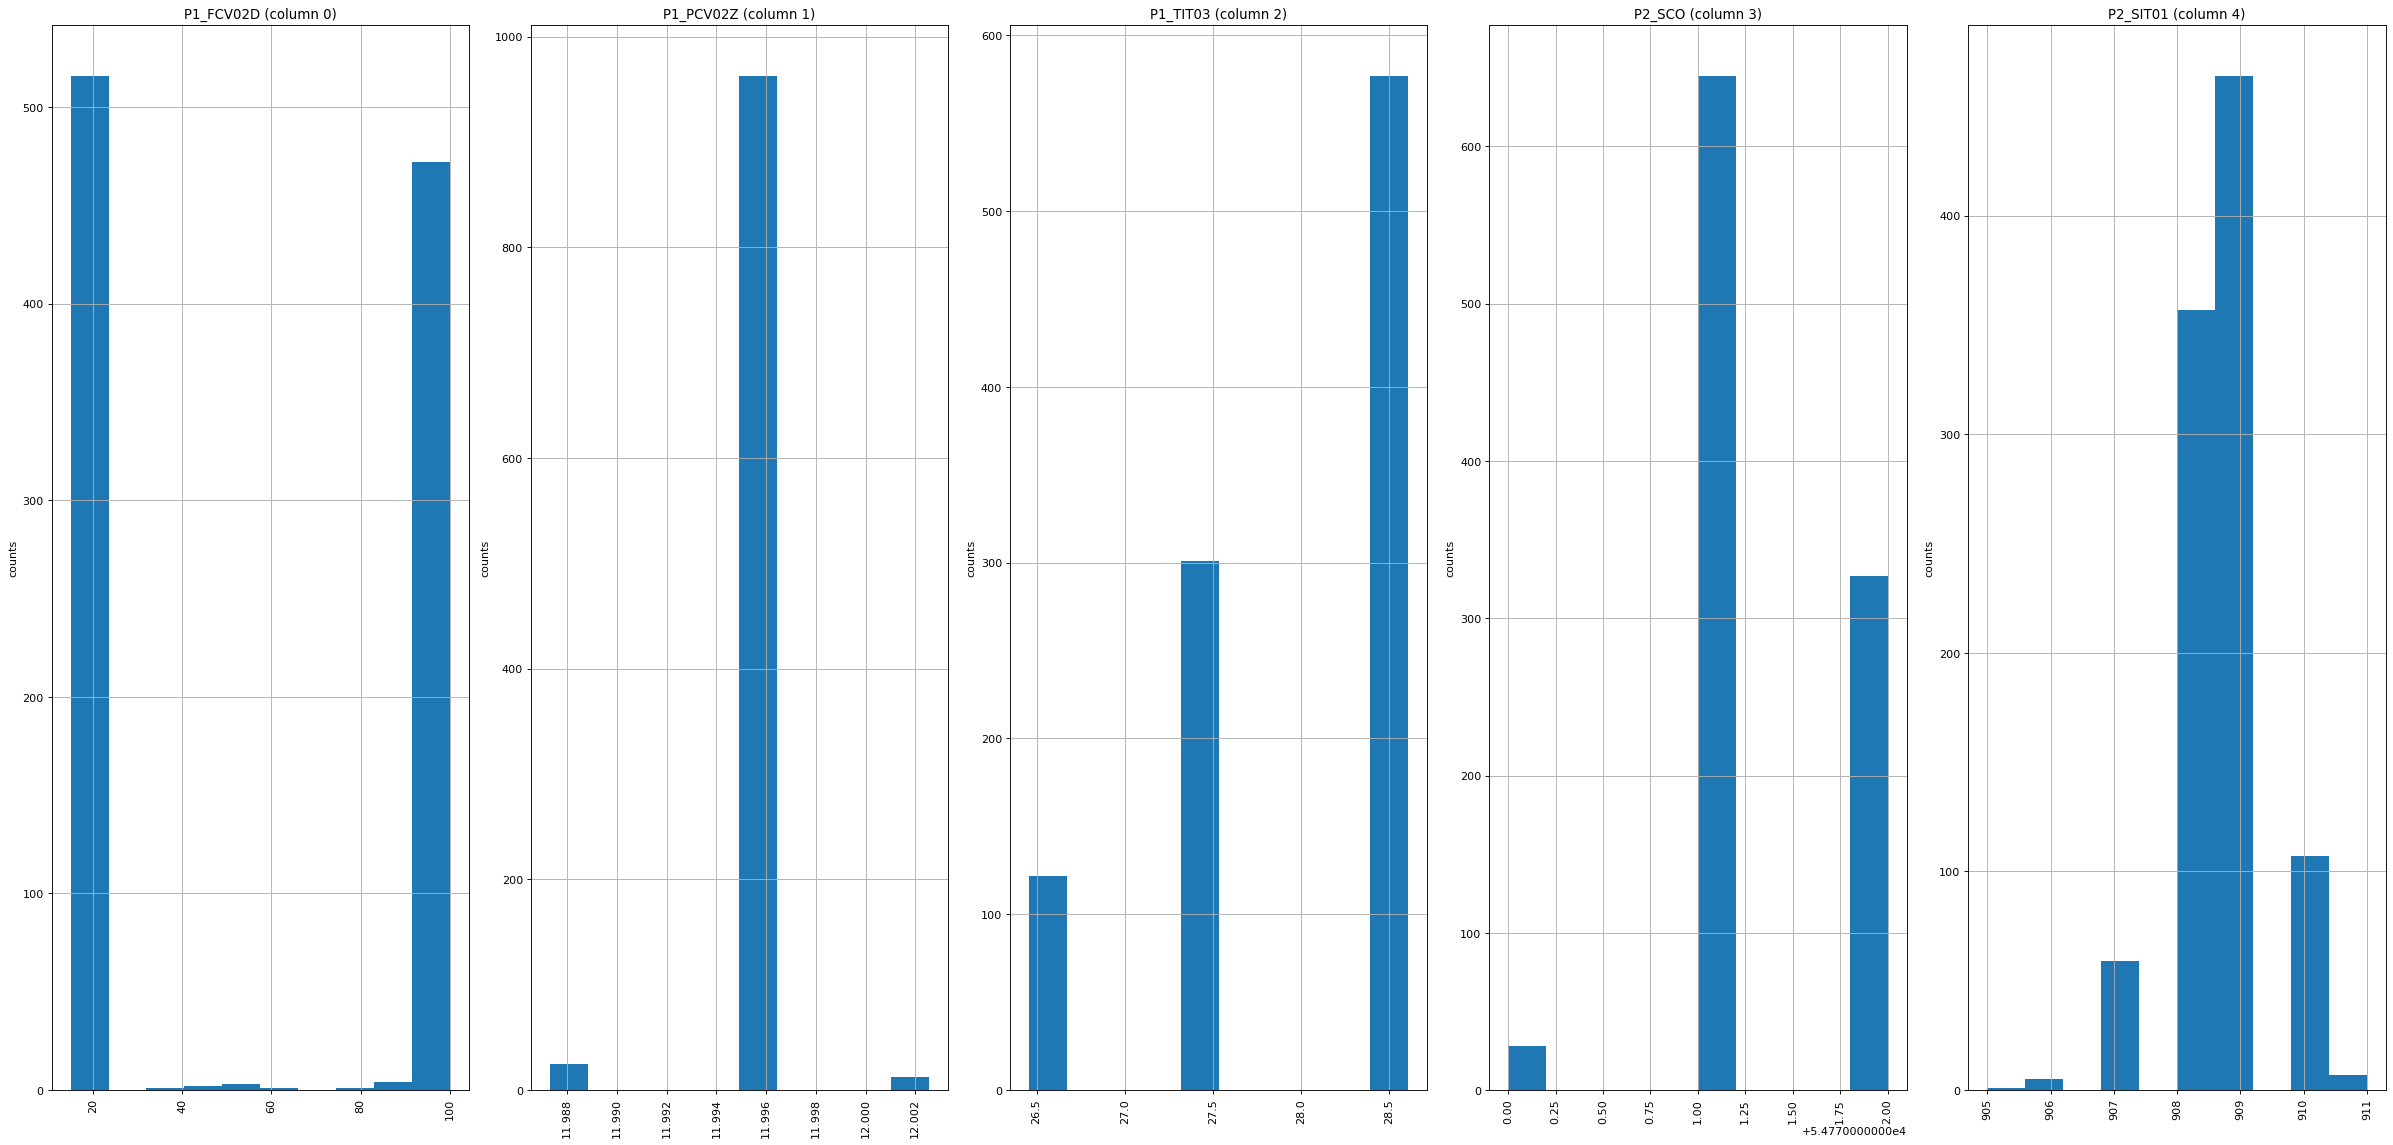

In [20]:
plotPerColumnDistribution(df3, 10, 5)

Correlation matrix:

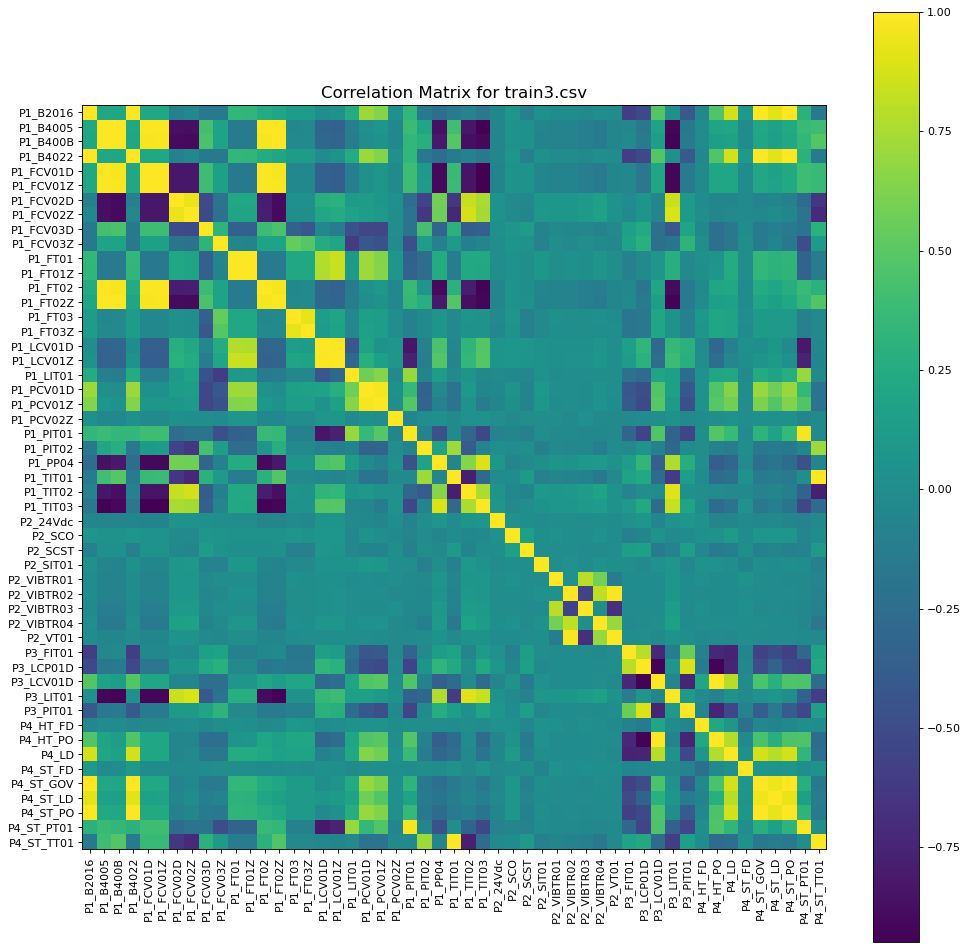

In [21]:
plotCorrelationMatrix(df3, 15)

Scatter and density plots:

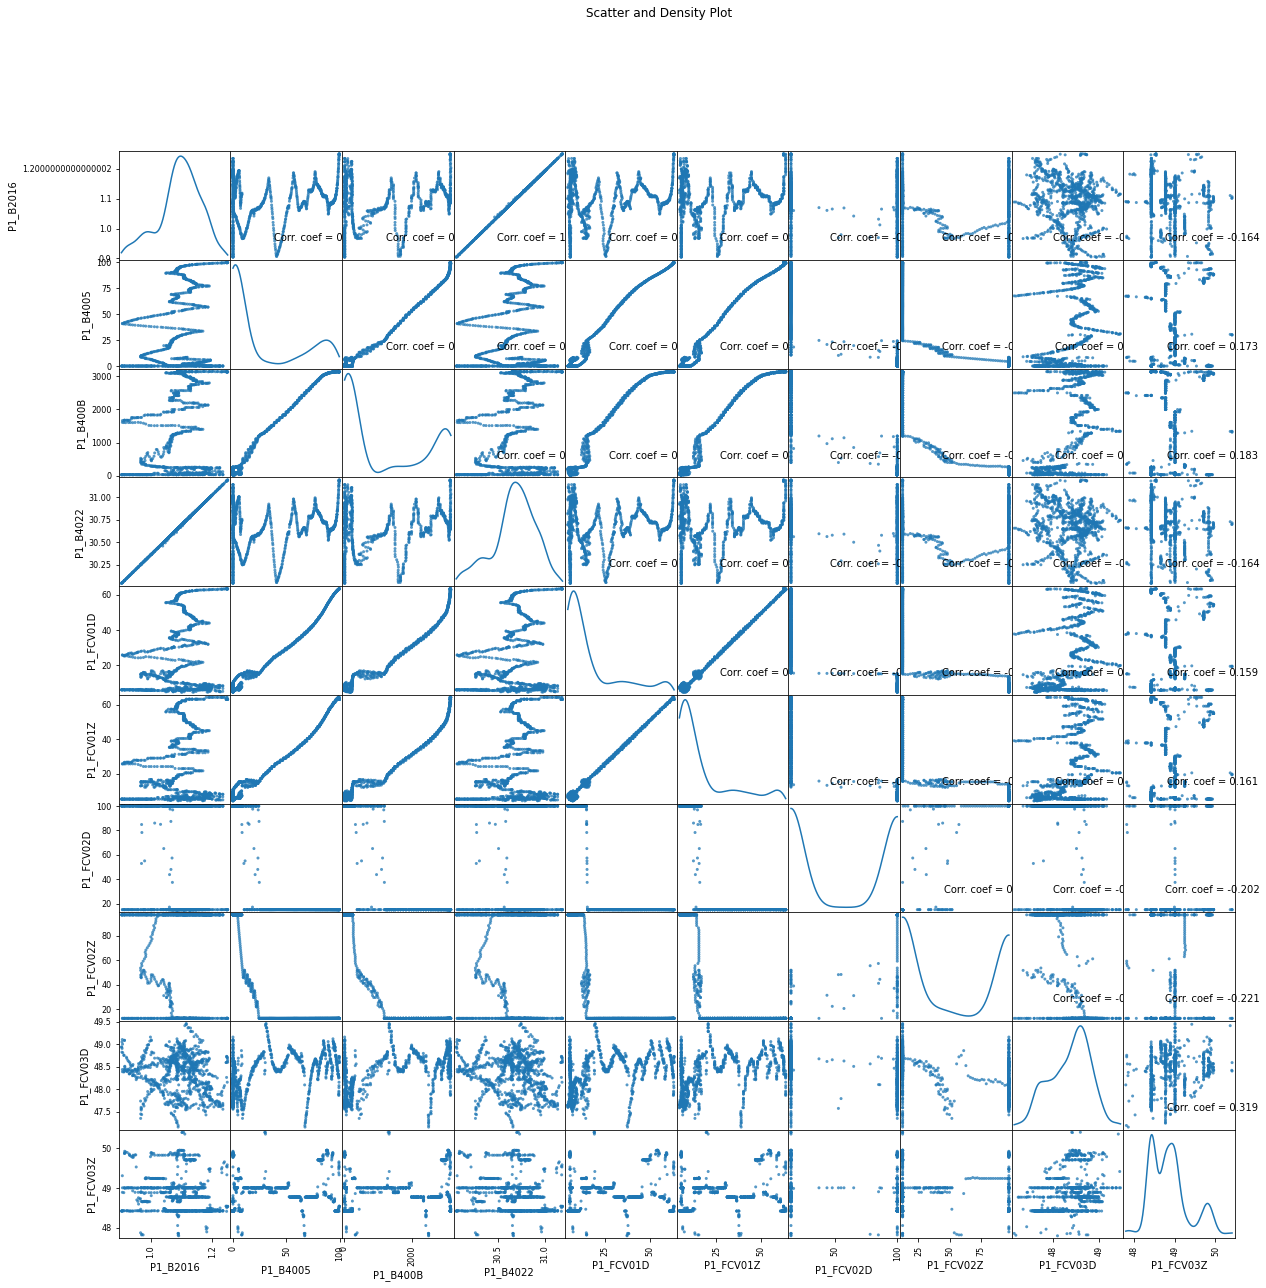

In [22]:
plotScatterMatrix(df3, 20, 10)

### Let's check 4th file: ../HAI/train4.csv

In [23]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# normal_20190911T200000_to_20190915T100000.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df4 = pd.read_csv('../HAI/train4.csv', delimiter=',', nrows = nRowsRead)
df4.dataframeName = 'train4.csv'
nRow, nCol = df4.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 88 columns


Let's take a quick look at what the data looks like:

In [24]:
df4.head(5)

timestamp  P1_B2004  P1_B2016   P1_B3004   P1_B3005  P1_B4002  \
0  2021-07-26 12:00:00   0.11126   1.02040  452.41907  972.89972  25.69677   
1  2021-07-26 12:00:01   0.11126   1.01915  452.41907  972.89972  25.69677   
2  2021-07-26 12:00:02   0.11126   1.02166  452.41907  972.89972  25.69677   
3  2021-07-26 12:00:03   0.11126   1.01834  452.41907  972.89972  25.69677   
4  2021-07-26 12:00:04   0.11126   1.01686  452.41907  972.89972  25.69677   

   P1_B4005   P1_B400B  P1_B4022  P1_FCV01D  ...  P4_HT_PS      P4_LD  \
0  10.72952  150.15552  29.22724    9.07711  ...         0  360.82178   
1  10.83733   49.85331  29.22304    9.36480  ...         0  360.36963   
2  10.94343   40.91545  29.23144    9.48246  ...         0  359.95367   
3  10.99790   42.90168  29.22037    7.63938  ...         0  360.18878   
4  11.11872  167.03828  29.21541    6.89269  ...         0  359.77289   

   P4_ST_FD  P4_ST_GOV   P4_ST_LD   P4_ST_PO  P4_ST_PS  P4_ST_PT01  \
0   0.00181      16582  300.76318  302.82477  15.91843        9946   
1   0.00007      16617  300.14832  302.82477  15.91843        9946   
2  -0.00174      16598  299.47919  302.20990  15.91843        9946   
3   0.00065      16625  299.93127  302.86096  15.91843        9946   
4   0.00130      16583  299.06323  302.44501  15.91843        9946   

   P4_ST_TT01  Attack  
0       26902       0  
1       26903       0  
2       26910       0  
3       26911       0  
4       26915       0  

[5 rows x 88 columns]

Distribution graphs (histogram/bar graph) of sampled columns:

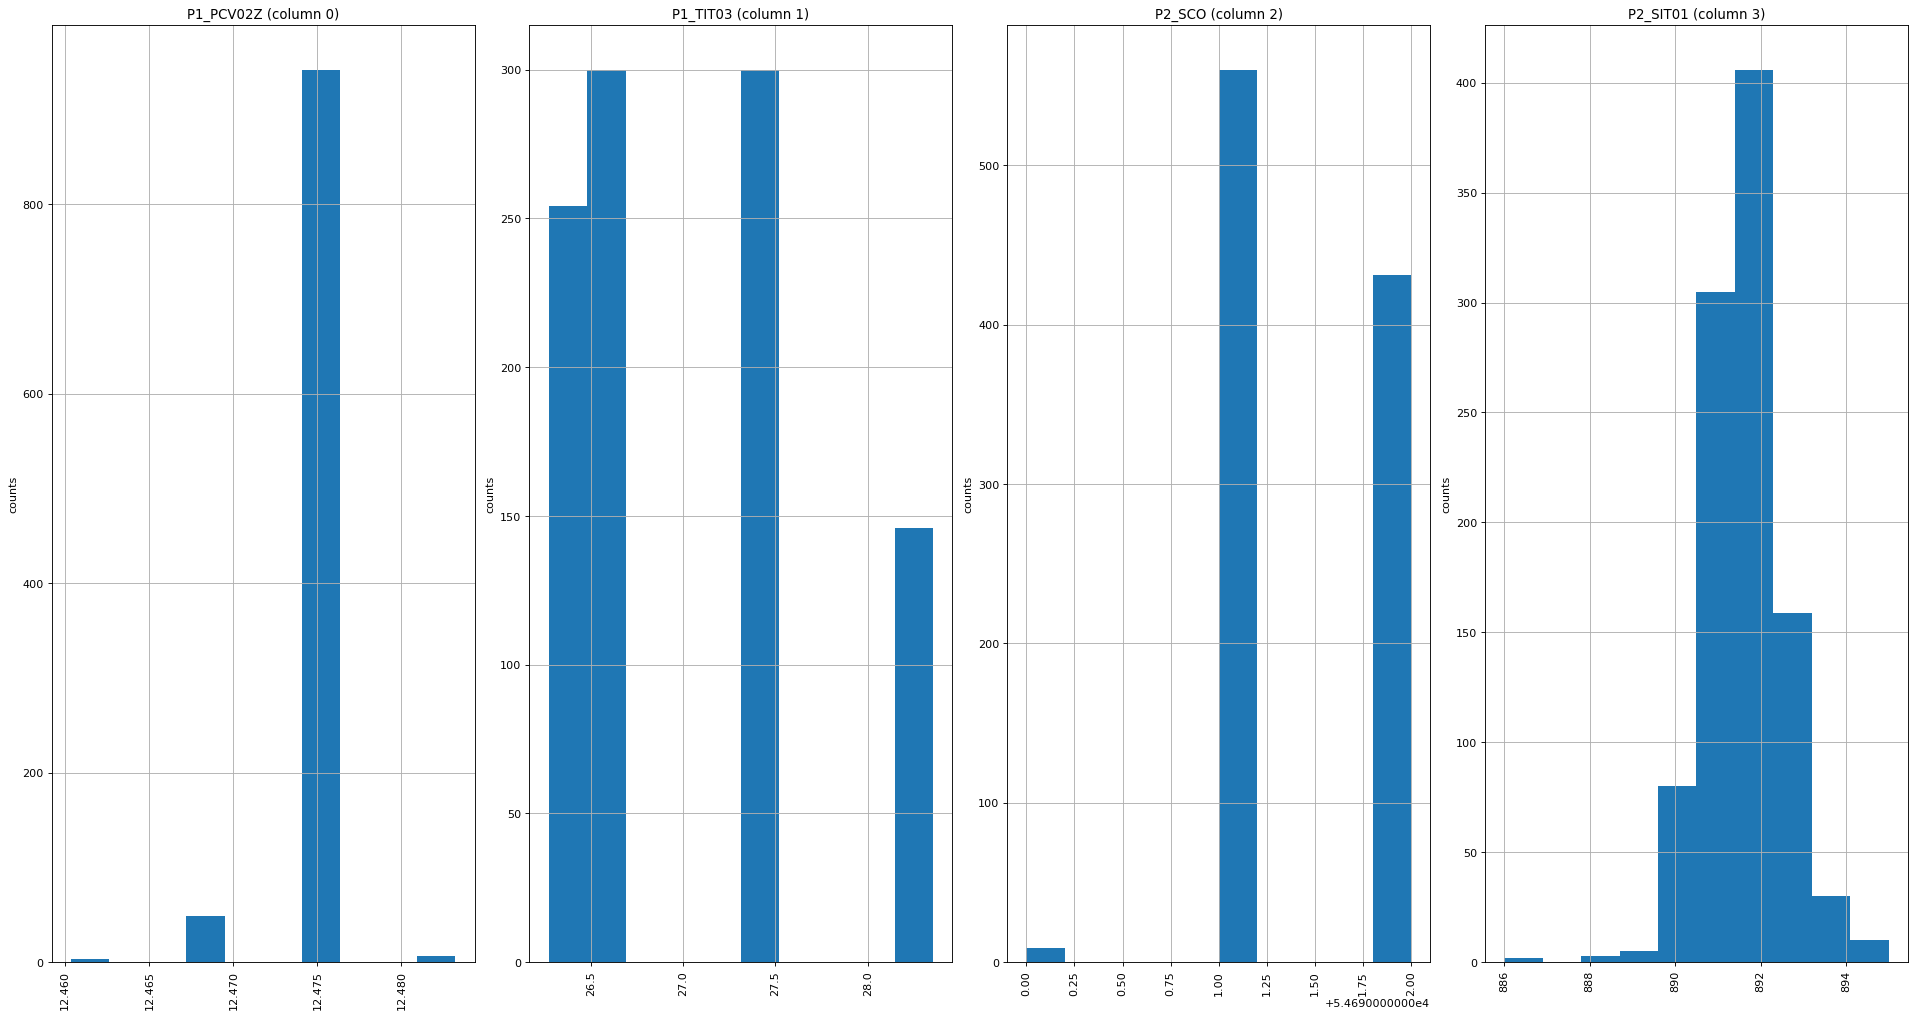

In [25]:
plotPerColumnDistribution(df4, 10, 5)

Correlation matrix:

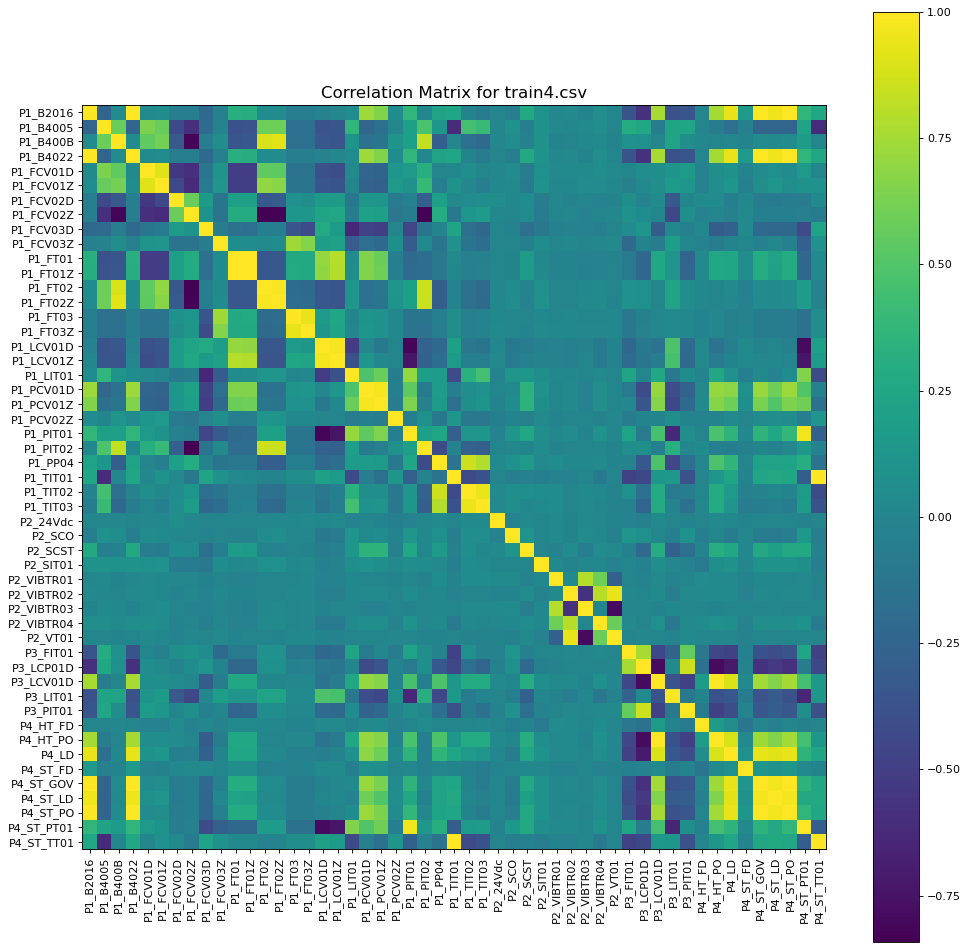

In [26]:
plotCorrelationMatrix(df4, 15)

Scatter and density plots:

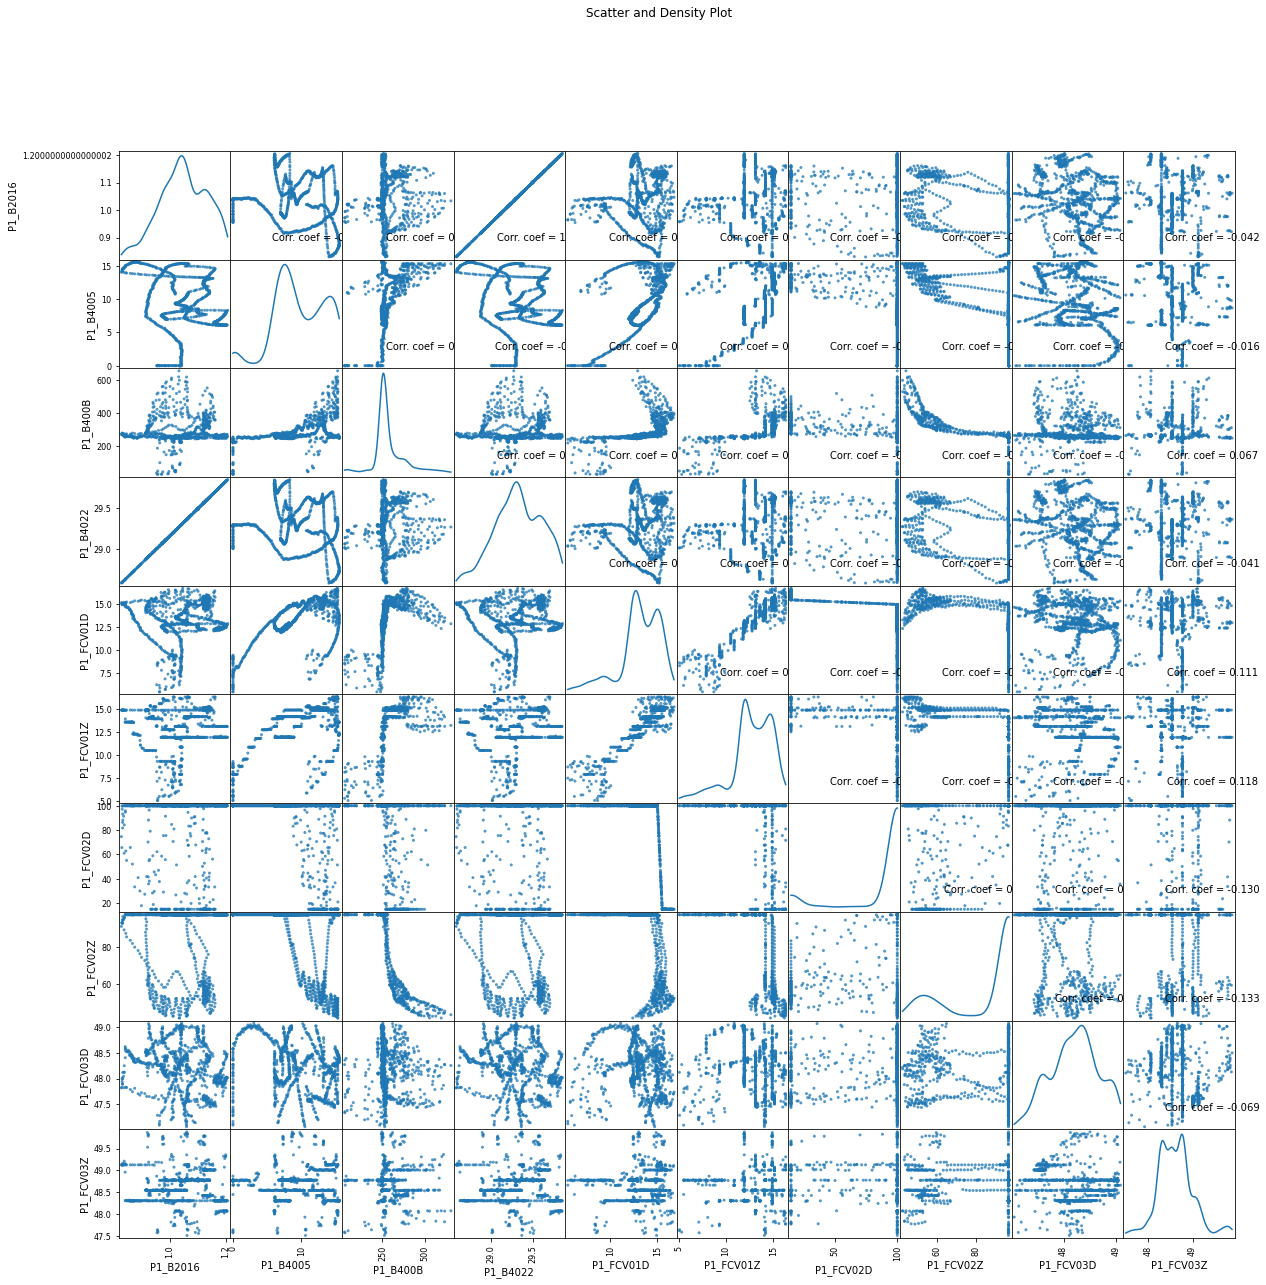

In [27]:
plotScatterMatrix(df4, 20, 10)

### Let's check 5th file: ../HAI/train5.csv

In [28]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# normal_20190911T200000_to_20190915T100000.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df5 = pd.read_csv('../HAI/train5.csv', delimiter=',', nrows = nRowsRead)
df5.dataframeName = 'train5.csv'
nRow, nCol = df5.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 88 columns


Let's take a quick look at what the data looks like:

In [29]:
df5.head(5)

timestamp  P1_B2004  P1_B2016   P1_B3004    P1_B3005  P1_B4002  \
0  2021-08-02 15:00:01   0.13591   1.07035  423.36737  1013.26862  31.86175   
1  2021-08-02 15:00:02   0.13591   1.07115  423.36737  1013.26862  31.86175   
2  2021-08-02 15:00:03   0.13591   1.07401  423.36737  1013.26862  31.86175   
3  2021-08-02 15:00:04   0.13591   1.07847  423.36737  1013.26862  31.86175   
4  2021-08-02 15:00:05   0.13591   1.08008  423.36737  1013.26862  31.86175   

   P1_B4005    P1_B400B  P1_B4022  P1_FCV01D  ...  P4_HT_PS      P4_LD  \
0     100.0  3189.37427  35.47652      100.0  ...         0  331.52490   
1     100.0  3190.00000  35.47919      100.0  ...         0  333.13440   
2     100.0  3187.99780  35.48873      100.0  ...         0  332.17590   
3     100.0  3187.99780  35.50361      100.0  ...         0  334.67157   
4     100.0  3190.00000  35.50895      100.0  ...         0  334.05676   

   P4_ST_FD  P4_ST_GOV   P4_ST_LD   P4_ST_PO  P4_ST_PS  P4_ST_PT01  \
0  -0.00058      17356  331.97699  317.49127  13.60476        9972   
1  -0.00188      17488  332.24829  319.13702  13.60476        9972   
2   0.00051      17478  331.97699  320.09546  13.60476        9972   
3   0.00109      17509  334.52692  321.10822  13.60476        9972   
4  -0.00014      17574  335.39496  321.90393  13.60476        9972   

   P4_ST_TT01  Attack  
0       27261       0  
1       27268       0  
2       27261       0  
3       27263       0  
4       27261       0  

[5 rows x 88 columns]

Distribution graphs (histogram/bar graph) of sampled columns:

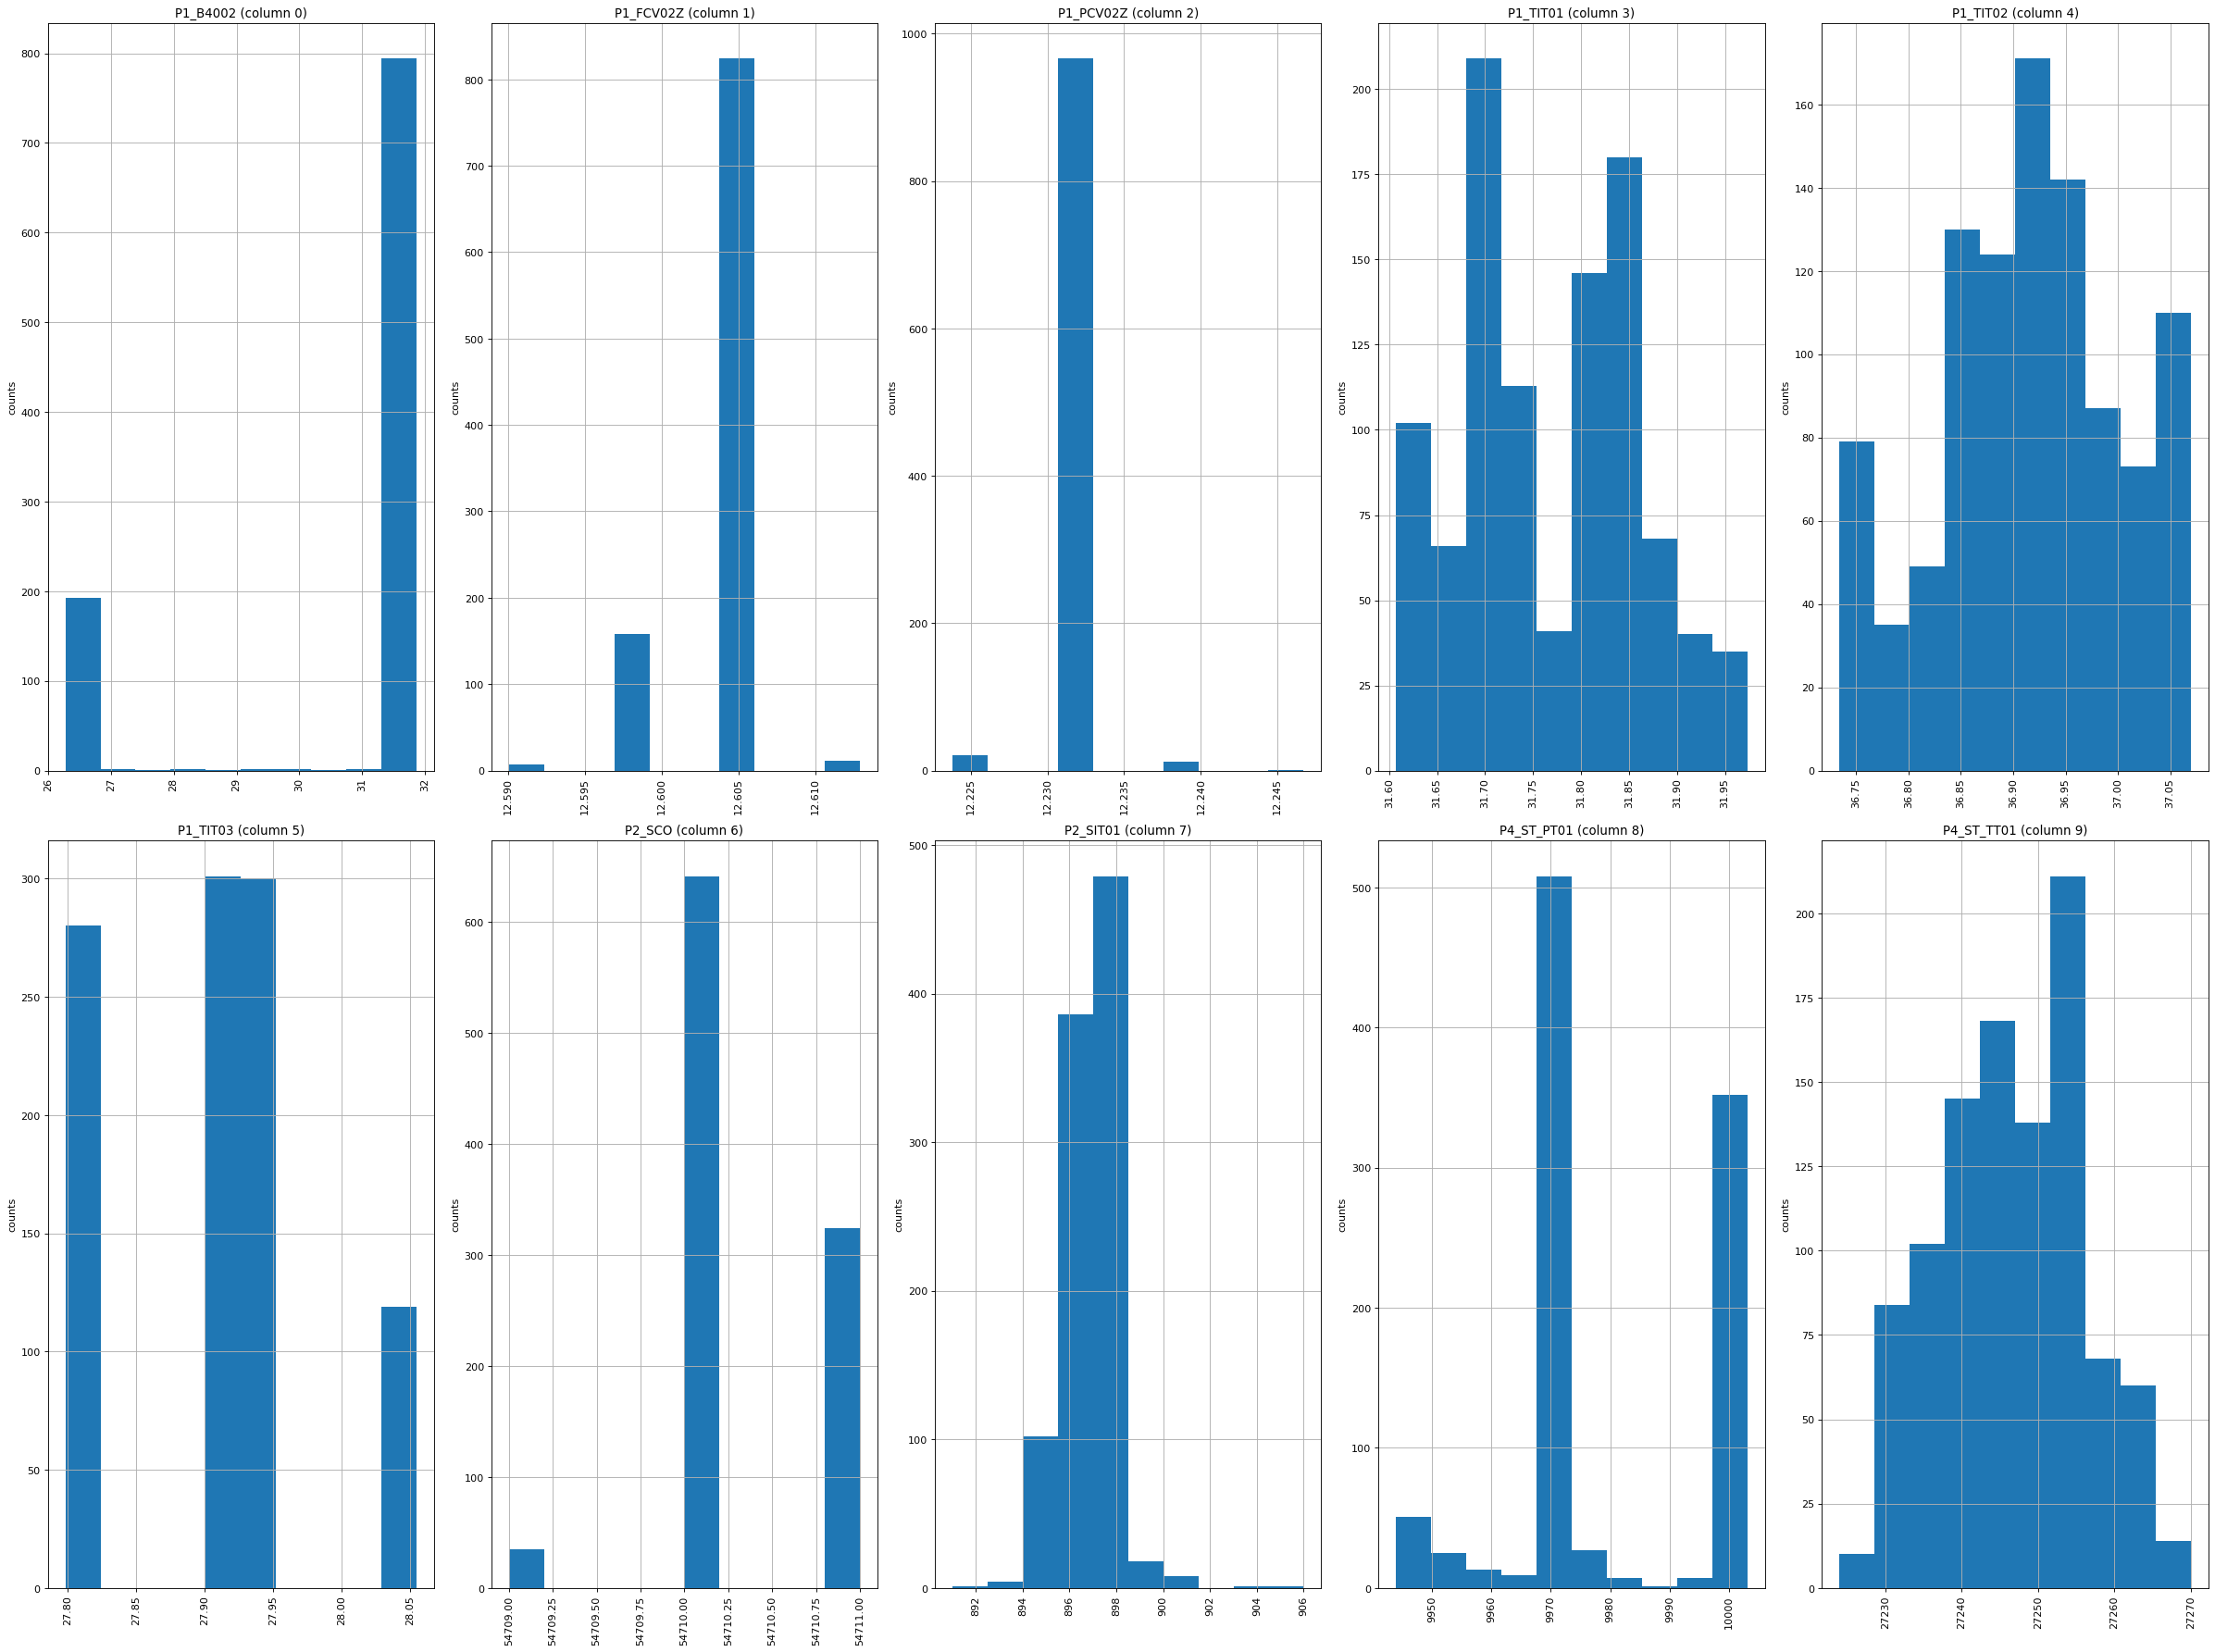

In [30]:
plotPerColumnDistribution(df5, 10, 5)

Correlation matrix:

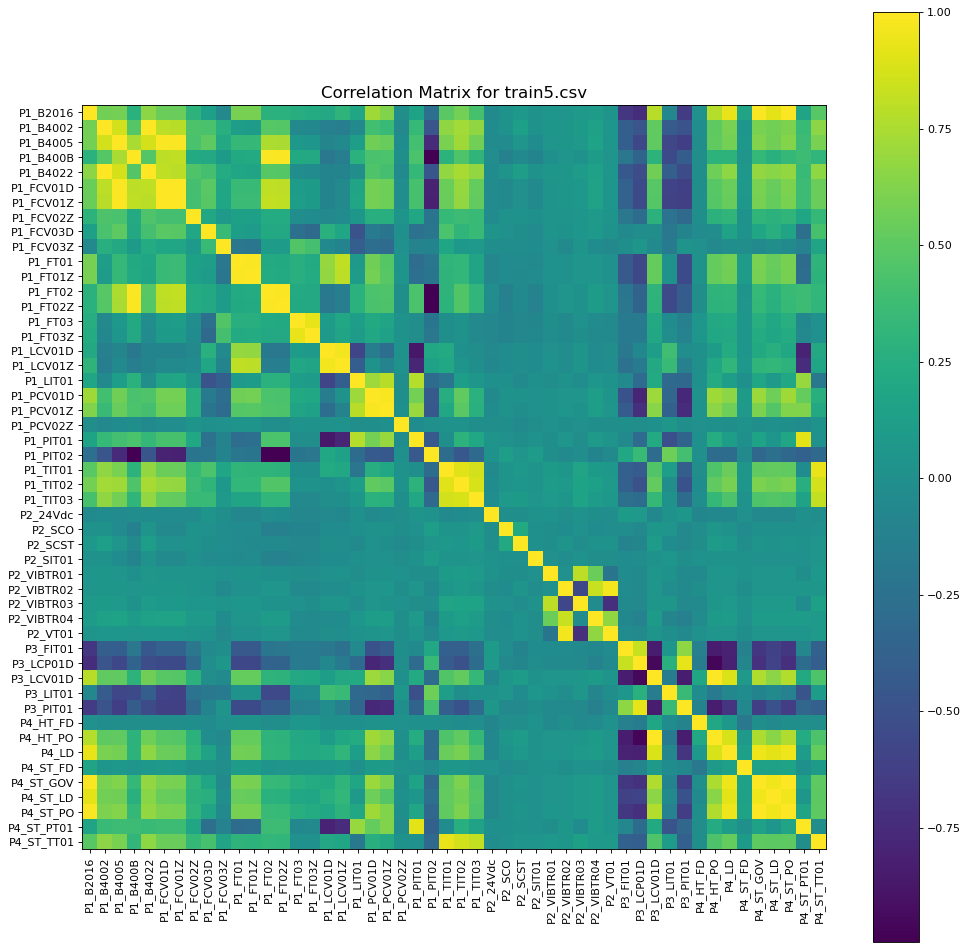

In [31]:
plotCorrelationMatrix(df5, 15)

Scatter and density plots:

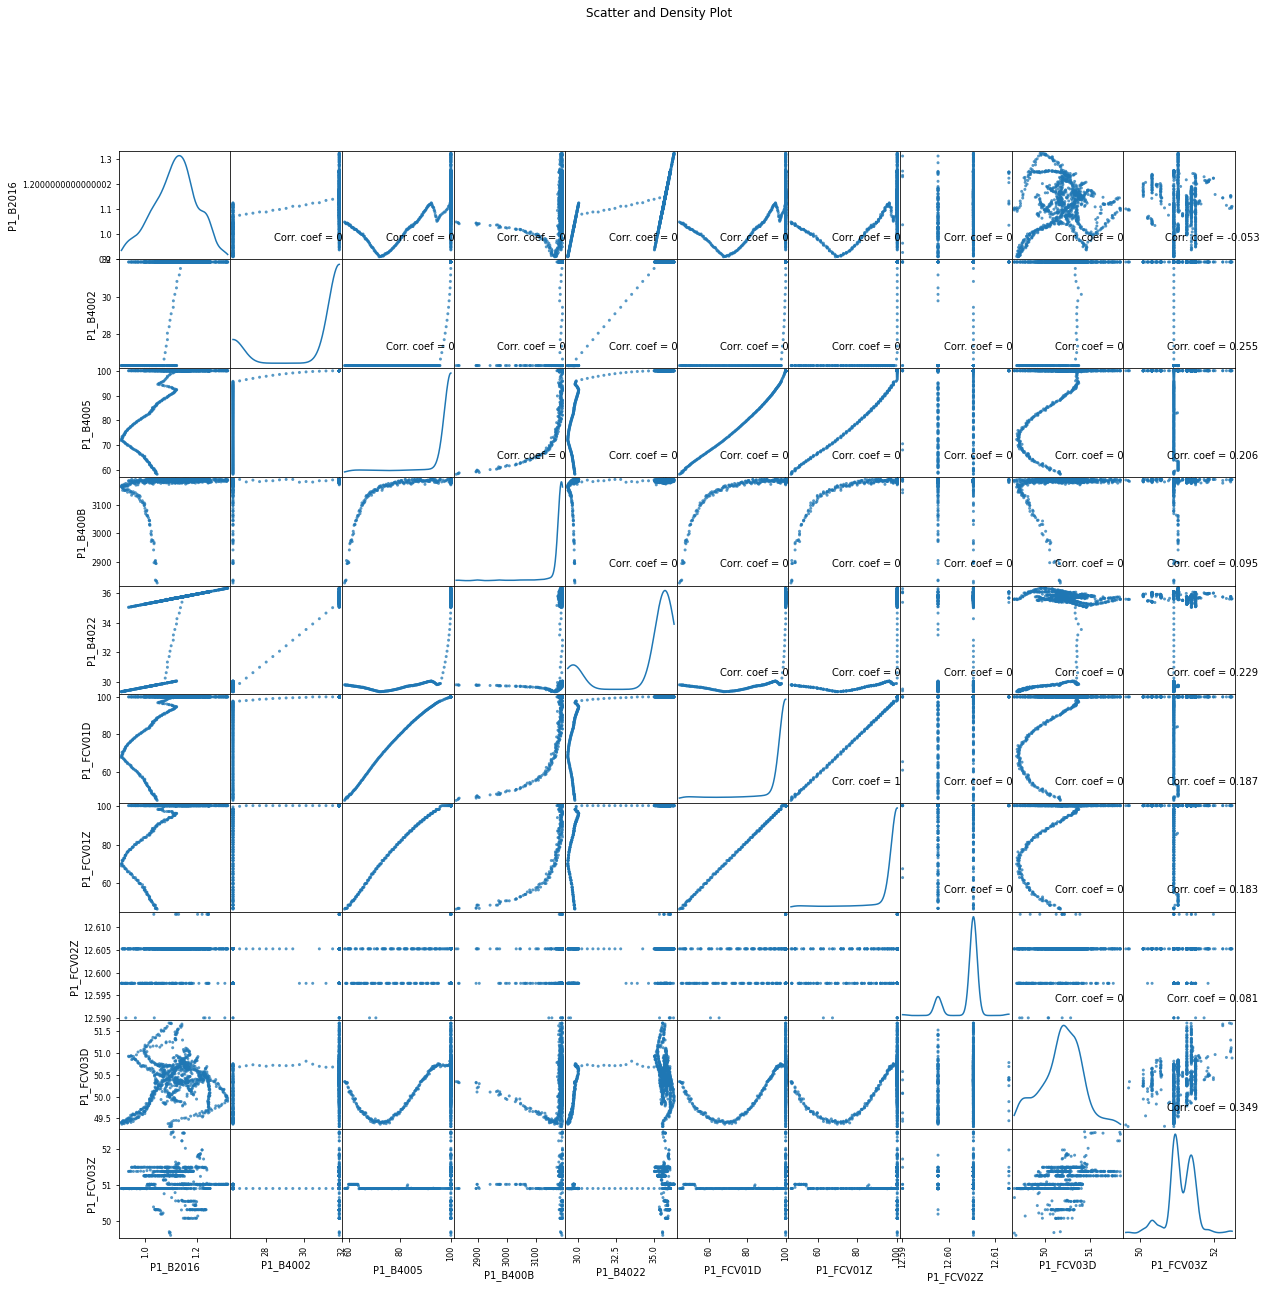

In [32]:
plotScatterMatrix(df5, 20, 10)

### Let's check 6th file: ../HAI/train6.csv

In [33]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# normal_20190911T200000_to_20190915T100000.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df6 = pd.read_csv('../HAI/train6.csv', delimiter=',', nrows = nRowsRead)
df6.dataframeName = 'train6.csv'
nRow, nCol = df6.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 88 columns


Let's take a quick look at what the data looks like:

In [34]:
df6.head(5)

timestamp  P1_B2004  P1_B2016   P1_B3004   P1_B3005  P1_B4002  \
0  2021-08-06 09:00:01   0.09631   0.98680  476.44827  993.42383        32   
1  2021-08-06 09:00:02   0.09631   0.98543  476.44827  993.42383        32   
2  2021-08-06 09:00:03   0.09631   0.98566  476.44827  993.42383        32   
3  2021-08-06 09:00:04   0.09631   0.98234  476.44827  993.42383        32   
4  2021-08-06 09:00:05   0.09631   0.98817  476.44827  993.42383        32   

   P1_B4005    P1_B400B  P1_B4022  P1_FCV01D  ...  P4_HT_PS      P4_LD  \
0       100  3177.11230  35.46829        100  ...   6.34956  294.46979   
1       100  3182.61768  35.46371        100  ...   6.34956  294.90381   
2       100  3182.74292  35.46448        100  ...   6.34956  298.43024   
3       100  3179.48975  35.45341        100  ...   6.34956  301.61316   
4       100  3177.11230  35.47287        100  ...   6.34956  309.10010   

   P4_ST_FD  P4_ST_GOV   P4_ST_LD   P4_ST_PO  P4_ST_PS  P4_ST_PT01  \
0  -0.00094      16364  294.28894  300.51001   8.27546        9999   
1   0.00065      16303  294.72296  299.85895   8.27546        9999   
2  -0.00217      16406  298.05048  300.94403   8.27546        9999   
3   0.00130      16446  302.51733  302.49927   8.27546        9999   
4  -0.00145      16551  308.39484  303.96411   8.27546        9999   

   P4_ST_TT01  Attack  
0       27205       0  
1       27206       0  
2       27213       0  
3       27205       0  
4       27210       0  

[5 rows x 88 columns]

Distribution graphs (histogram/bar graph) of sampled columns:

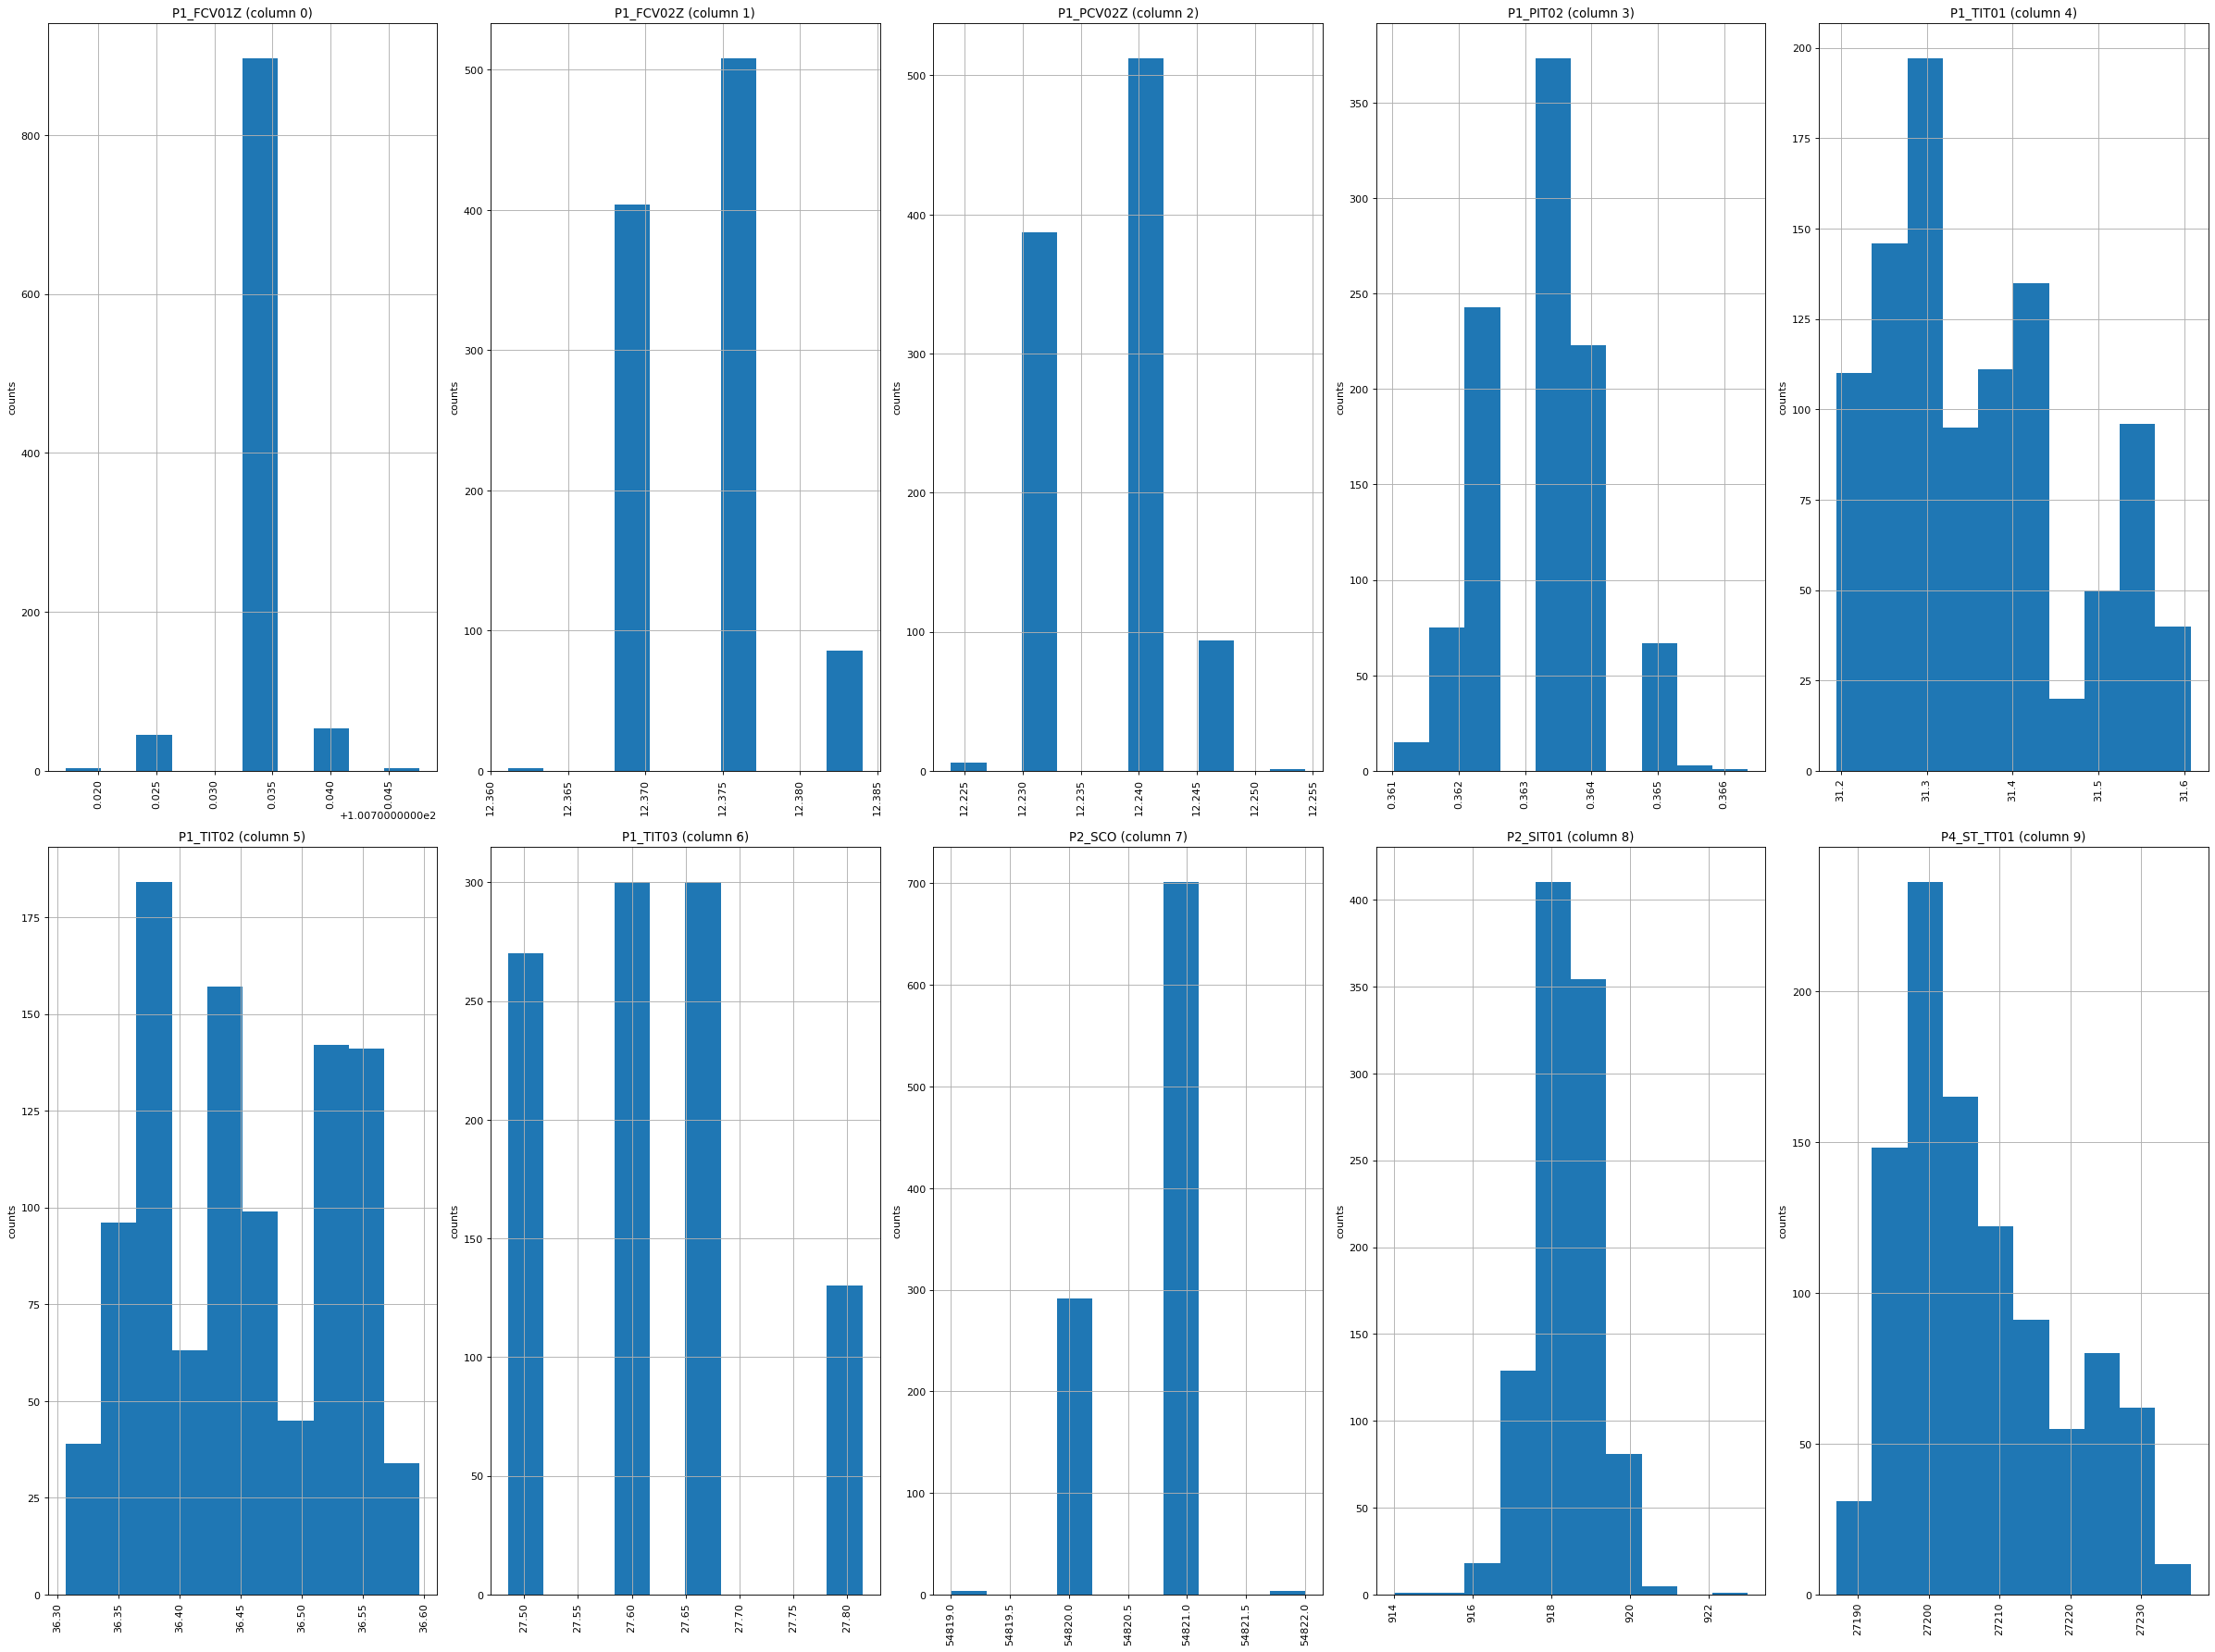

In [35]:
plotPerColumnDistribution(df6, 10, 5)

Correlation matrix:

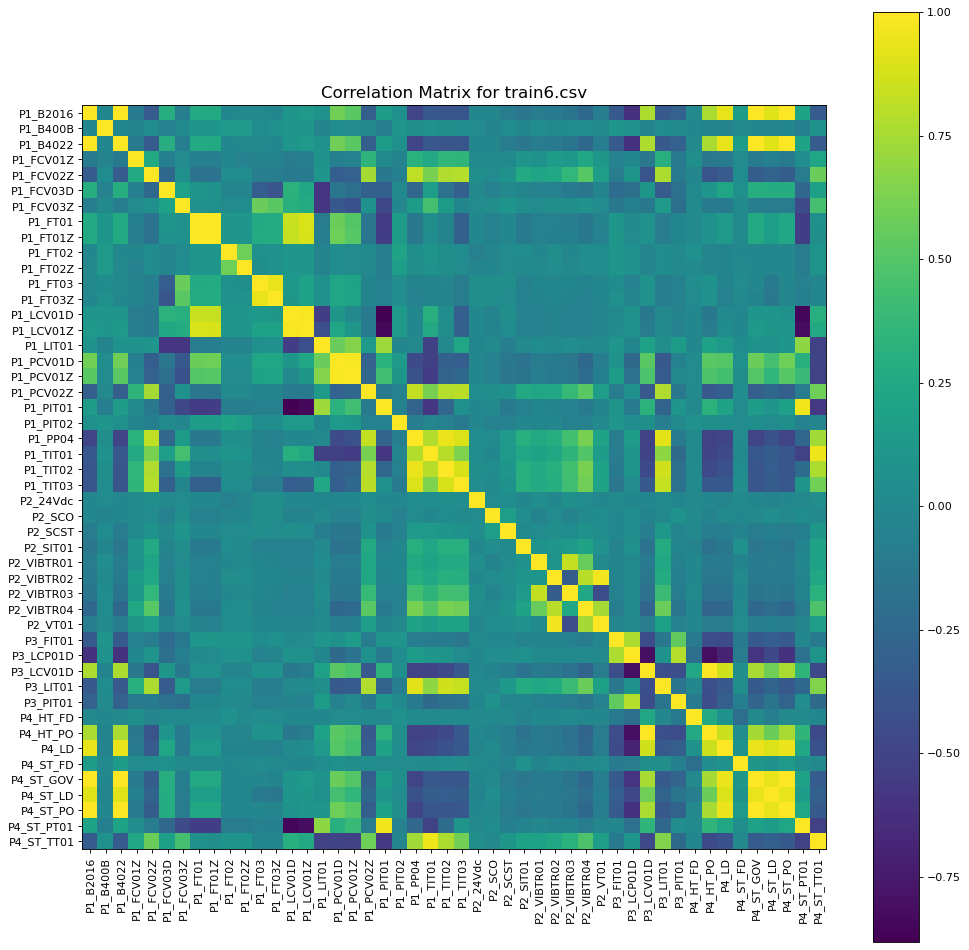

In [36]:
plotCorrelationMatrix(df6, 15)

Scatter and density plots:

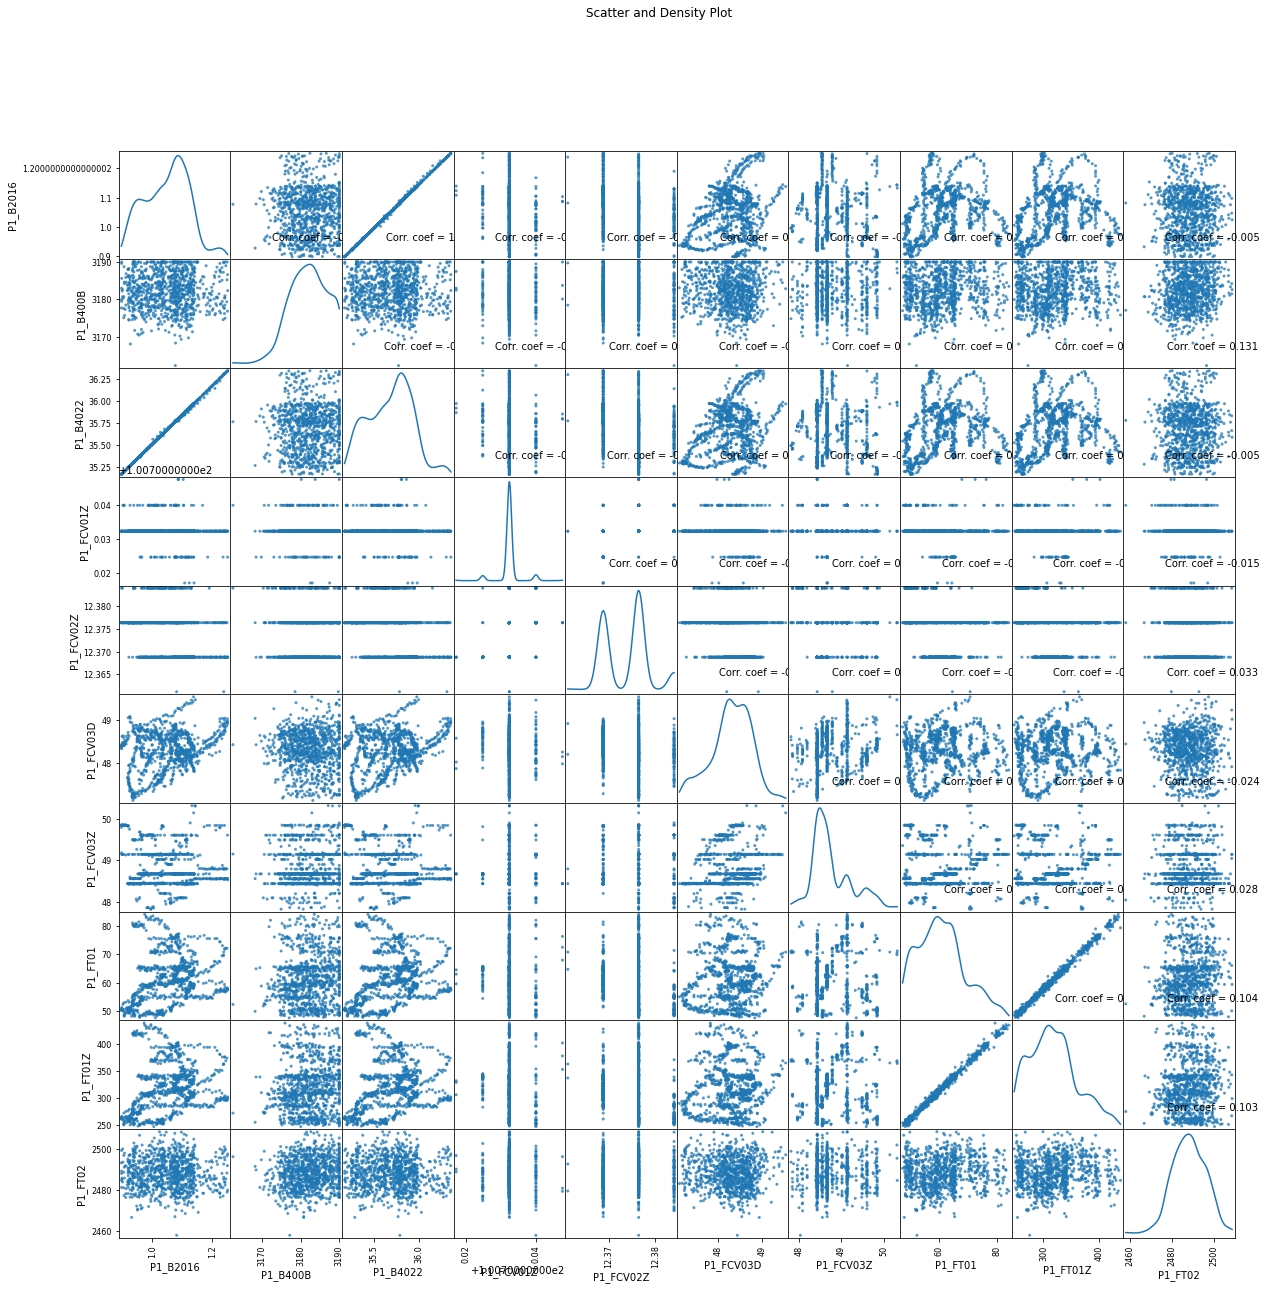

In [37]:
plotScatterMatrix(df6, 20, 10)

## Let's form the overall trainig set and testing set

In [38]:
data_train = pd.concat([df1, df2, df3, df4, df5, df6], axis=0)
data_train.dataframeName = 'Training_Dataset'
nRow, nCol = data_train.shape
print(f'There are {nRow} rows and {nCol} columns in {data_train.dataframeName}')

There are 299201 rows and 88 columns in Training_Dataset


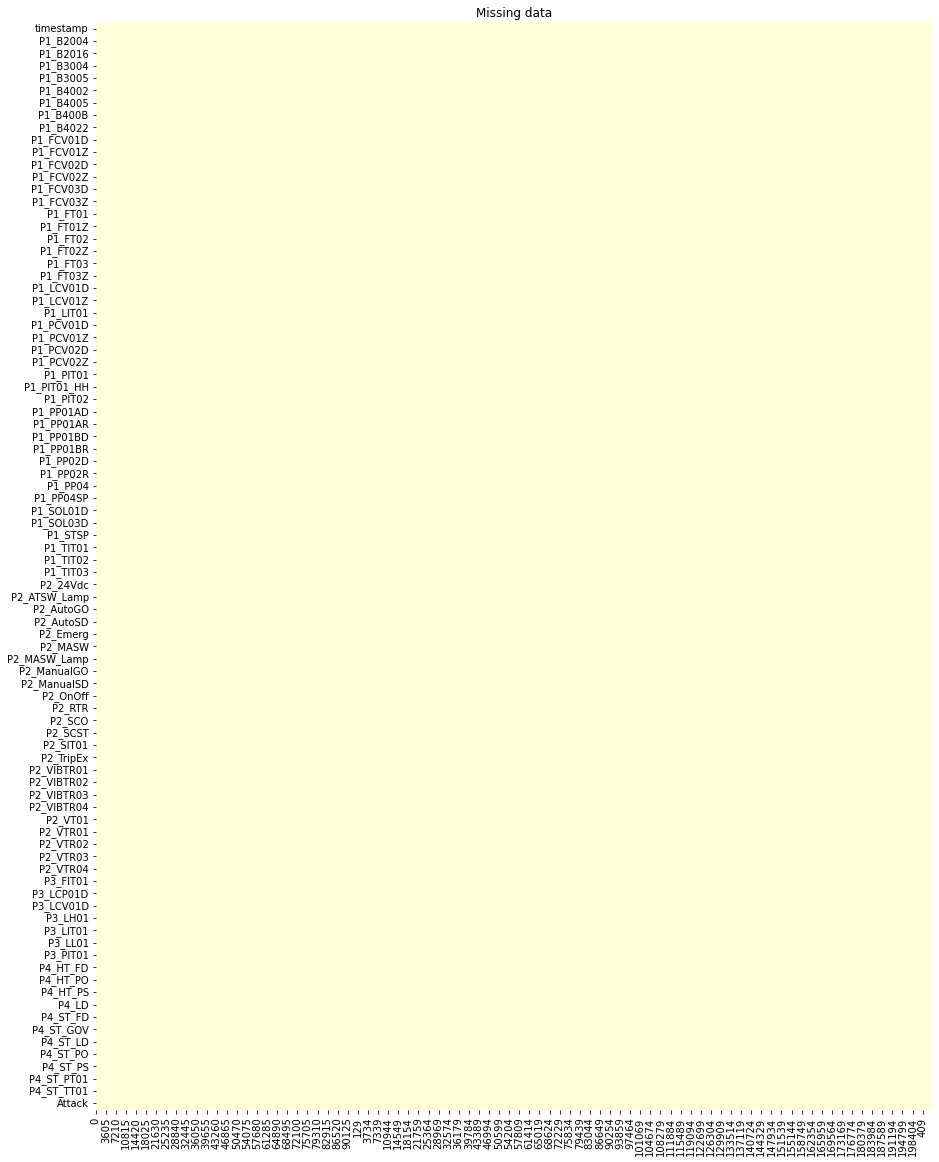

In [39]:
# Missing Data
# Use the heatmap functionality of seaborn to see where we are missing data.
plt.figure(figsize=(15,20))
ax = sns.heatmap(data_train.isna().transpose(), cmap = "YlGnBu", center = 0, cbar = False).set(title='Missing data')

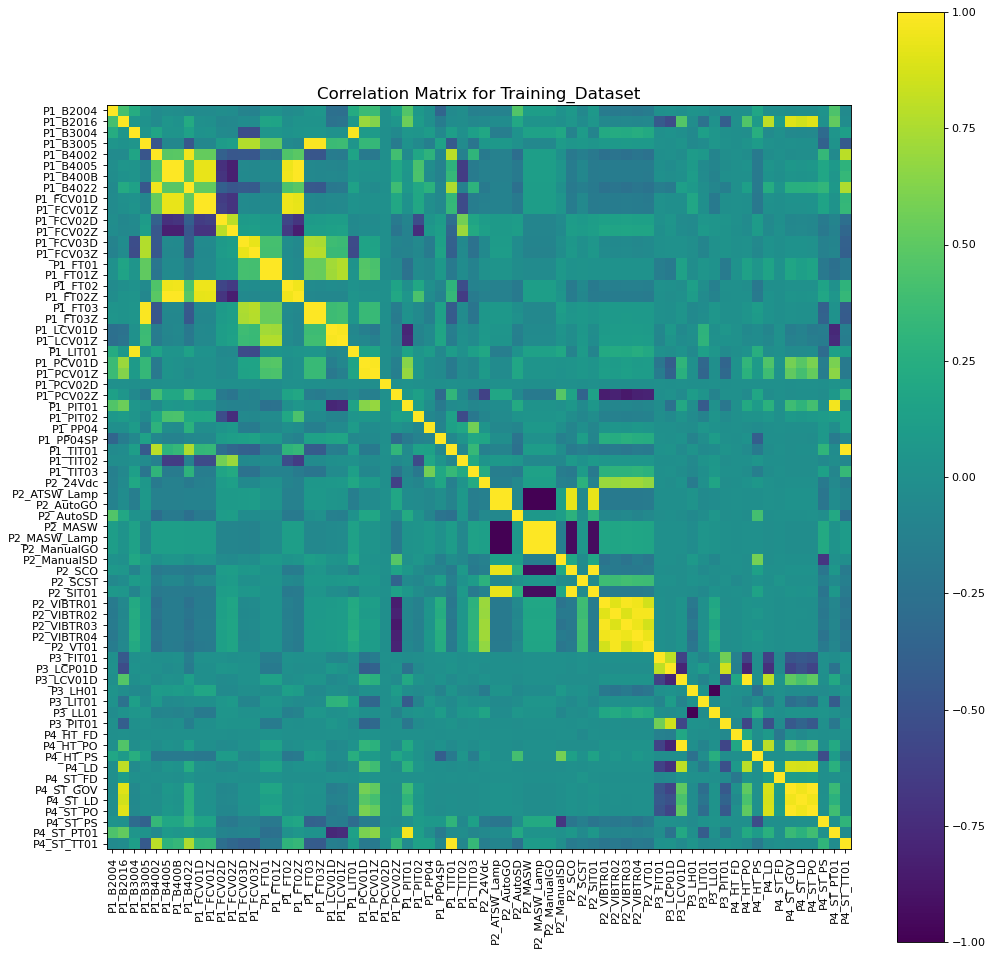

In [40]:
plotCorrelationMatrix(data_train, 15)

In [41]:
training_set_features = pd.DataFrame(data_train[list(data_train)[1:87]])
training_set_target = pd.DataFrame(data_train[list(data_train)[87]])
training_set_timestampFeature = pd.DataFrame(data_train[list(data_train)[0]])

In [42]:
# Test1
nRowsRead = None # specify 'None' if want to read whole file
# normal_20190911T200000_to_20190915T100000.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df7 = pd.read_csv('../HAI/test1.csv', delimiter=',', nrows = nRowsRead)
df7.dataframeName = 'test1.csv'
nRow, nCol = df7.shape
print(f'There are {nRow} rows and {nCol} columns in {df7.dataframeName}')

# Test2
nRowsRead = None # specify 'None' if want to read whole file
# normal_20190911T200000_to_20190915T100000.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df8 = pd.read_csv('../HAI/test2.csv', delimiter=',', nrows = nRowsRead)
df8.dataframeName = 'test2.csv'
nRow, nCol = df8.shape
print(f'There are {nRow} rows and {nCol} columns in {df8.dataframeName}')

# Test3
nRowsRead = None # specify 'None' if want to read whole file
# normal_20190911T200000_to_20190915T100000.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df9 = pd.read_csv('../HAI/test3.csv', delimiter=',', nrows = nRowsRead)
df9.dataframeName = 'test3.csv'
nRow, nCol = df9.shape
print(f'There are {nRow} rows and {nCol} columns in {df9.dataframeName}')

# Test4
nRowsRead = None # specify 'None' if want to read whole file
# normal_20190911T200000_to_20190915T100000.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df10 = pd.read_csv('../HAI/test4.csv', delimiter=',', nrows = nRowsRead)
df10.dataframeName = 'test4.csv'
nRow, nCol = df10.shape
print(f'There are {nRow} rows and {nCol} columns in {df10.dataframeName}')

There are 86400 rows and 88 columns in test1.csv
There are 82800 rows and 88 columns in test2.csv
There are 62400 rows and 88 columns in test3.csv
There are 129600 rows and 88 columns in test4.csv


In [43]:
data_test = pd.concat([df7, df8, df9, df10], axis=0)
testing_set_features = pd.DataFrame(data_test[list(data_test)[1:87]])
testing_set_target = pd.DataFrame(data_test[list(data_test)[87]])
testing_set_timestampFeature = pd.DataFrame(data_test[list(data_test)[0]])

## Random forests dimensionality reduction

Feature importances:
  [1.46859024e-02 1.66376350e-03 7.26362582e-03 1.01331800e-03
 3.61249550e-04 1.96742260e-03 3.87695784e-04 1.74671472e-03
 5.80054199e-04 1.17917232e-05 0.00000000e+00 6.95073885e-04
 3.19441347e-03 4.56244337e-03 5.55201570e-02 4.07165519e-02
 1.37944414e-03 1.01658949e-03 8.90535839e-04 0.00000000e+00
 4.53439826e-02 3.89900882e-02 1.74098203e-02 4.97851893e-02
 5.49692672e-02 9.76992745e-03 9.03936722e-03 5.96805544e-02
 0.00000000e+00 1.12053789e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.29175846e-03 5.72115712e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.32912875e-03 1.46698590e-03 2.32011163e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.82110615e-03
 3.34264705e-03 9.53353082e-05 0.00000000e+00 0.00000000e+00
 1.72307966e-03 3.18564422e-03 0.00000000e+00 4.59556125e-02
 8.07242210e-06 2.35626454e-02 0.00000000e+00 9.15832395e-03
 1.56894893e-03 1.04034933e-02 3.79926870e-04 5.69634023e-03
 

Text(0.5, 1.0, 'Visualizing Important Features')

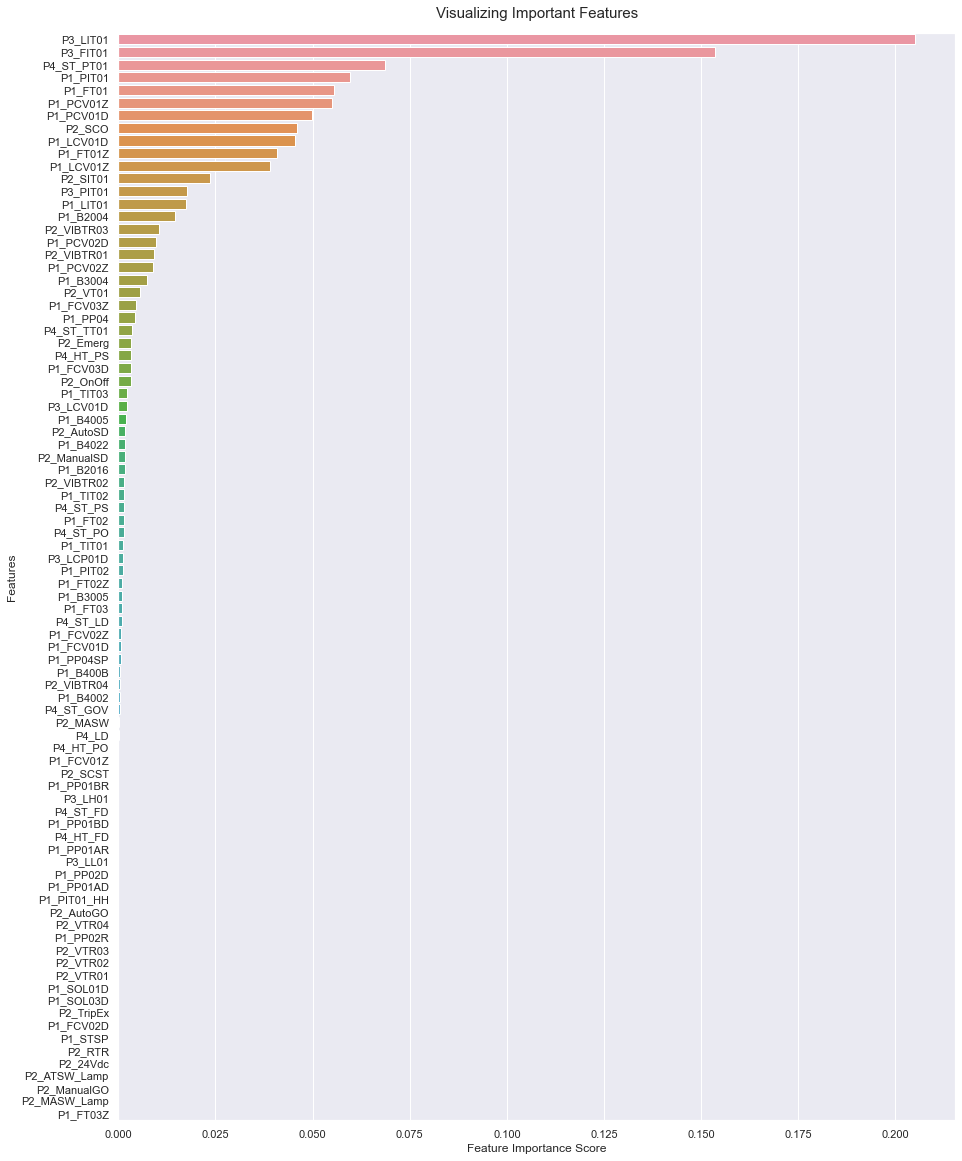

In [44]:
rf = RandomForestClassifier(n_estimators=100, max_depth=3,
                                 bootstrap=True, n_jobs=-1,
                                 random_state=0)

rf.fit(testing_set_features, np.ravel(testing_set_target))

feature_imp = pd.Series(rf.feature_importances_, 
                        index=list(testing_set_features)).sort_values(ascending=False)

print('Feature importances:\n ', rf.feature_importances_)
sns.set(rc = {'figure.figsize':(15,20)})
print(sns.barplot(x=feature_imp, y=feature_imp.index))
plt.xlabel('Feature Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title("Visualizing Important Features", fontsize=15, pad=15)

In [45]:
# Selecting features with non-zero importance
Features_selected = feature_imp.index[0:30]
X_train = training_set_features[Features_selected]
Y_train = training_set_target
X_test = testing_set_features[Features_selected]
Y_test = testing_set_target

In [46]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299201 entries, 0 to 999
Data columns (total 30 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   P3_LIT01    299201 non-null  int64  
 1   P3_FIT01    299201 non-null  int64  
 2   P4_ST_PT01  299201 non-null  int64  
 3   P1_PIT01    299201 non-null  float64
 4   P1_FT01     299201 non-null  float64
 5   P1_PCV01Z   299201 non-null  float64
 6   P1_PCV01D   299201 non-null  float64
 7   P2_SCO      299201 non-null  int64  
 8   P1_LCV01D   299201 non-null  float64
 9   P1_FT01Z    299201 non-null  float64
 10  P1_LCV01Z   299201 non-null  float64
 11  P2_SIT01    299201 non-null  int64  
 12  P3_PIT01    299201 non-null  int64  
 13  P1_LIT01    299201 non-null  float64
 14  P1_B2004    299201 non-null  float64
 15  P2_VIBTR03  299201 non-null  float64
 16  P1_PCV02D   299201 non-null  float64
 17  P2_VIBTR01  299201 non-null  float64
 18  P1_PCV02Z   299201 non-null  float64
 19  P1_B3

#### Data Standardization

In [47]:
#Obtain all the features into a list 
features = list(X_train)

# Exclude Boolean features
numeric_features = [elem for elem in features if elem not in ('P2_Emerg','P2_OnOff')]

# Apply the Standard Scaler to all numeric features
std = StandardScaler()

X_train[numeric_features] = std.fit_transform(X_train[numeric_features])
X_test[numeric_features] = std.transform(X_test[numeric_features])

In [ ]:
np.unique(Y_test)
pd.DataFrame(Y_test).value_counts(sort = True)

In [ ]:
#Visualizing the imbalanced dataset
count_classes = pd.DataFrame(Y_test).value_counts(sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2), np.unique(Y_test))
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");

## One class SVM

In [48]:
# model specification
model = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = 0.03).fit(X_train)
# prediction
y_pred = model.predict(X_test)

rows = np.arange(X_test.shape[0])

z = (y_pred)

#Convert the values -1(Outlier) and 1(Inlier) into 0 (No anamoly/no attack ) and 1(anamoly/attack) 
z=[0 if val==1 else val for val in z]
z=[1 if val==-1 else val for val in z]

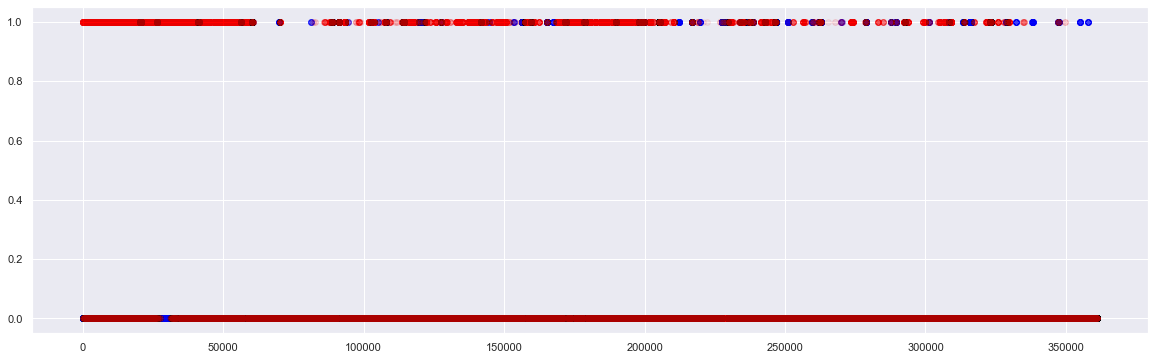

In [49]:
plt.rcParams["figure.figsize"] = (20,6)
plt.scatter(rows,Y_test, color='blue', alpha=0.01)
plt.scatter(rows,z, color='red', alpha=0.01)
plt.show()

In [50]:
#pd.DataFrame(testing_set_target).to_csv('testing_target.csv')
#pd.DataFrame(y_pred).to_csv('y_pred.csv')
#Anamoly_rows.to_csv('Anamoly_rows.csv')

The Classification report 
               precision    recall  f1-score   support

           0       0.97      0.87      0.92    349170
           1       0.08      0.34      0.14     12030

    accuracy                           0.85    361200
   macro avg       0.53      0.61      0.53    361200
weighted avg       0.95      0.85      0.89    361200
 

The Confuction Matrix
 [[304153  45017]
 [  7881   4149]] 



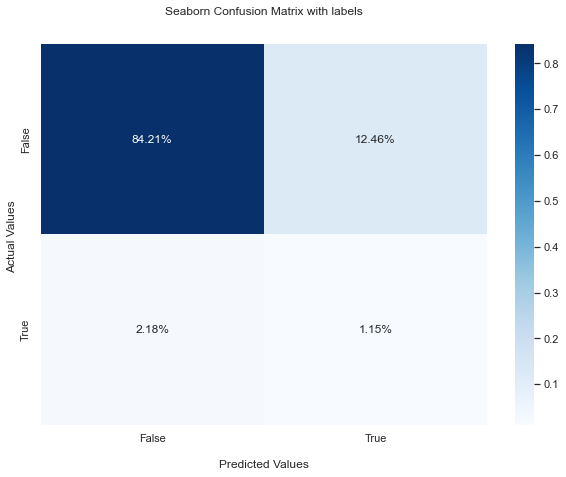

The accuracy score of the model is 85.3549280177187


In [52]:
#Write a function for all the metrics 

def metrics_model(model, model_pred, y_test):
    
    #classification report 
    print("The Classification report \n",classification_report (y_test, model_pred), '\n')
    
    
    #Plot a heat map for the confusion matrix
    print("The Confuction Matrix\n",confusion_matrix(y_test, model_pred),'\n')
    cf_matrix = confusion_matrix(y_test, model_pred)
    ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
    plt.rcParams["figure.figsize"] = (10,7)

    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()
    
    #print the accuracy score
    print(f"The accuracy score of the model is {100.0 * accuracy_score(y_test, model_pred)}")
    
    return 100.0 * accuracy_score(y_test, model_pred)

OneClassSVM = metrics_model(model, z,Y_test)

# IsolationForest Implementation

In [53]:
from sklearn.metrics import f1_score
from sklearn.ensemble import IsolationForest

# define outlier detection model
model = IsolationForest(contamination=0.01)
# fit on majority class
model.fit(X_train)
# detect outliers in the test set
yhat = model.predict(X_test)
# mark inliers 1, outliers -1

z_iso = (yhat)
z_iso = [0 if x==1 else x for x in z_iso]
z_iso = [1 if x==-1 else x for x in z_iso]


The Classification report 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97    349170
           1       0.15      0.15      0.15     12030

    accuracy                           0.94    361200
   macro avg       0.56      0.56      0.56    361200
weighted avg       0.94      0.94      0.94    361200
 

The Confuction Matrix
 [[338967  10203]
 [ 10277   1753]] 



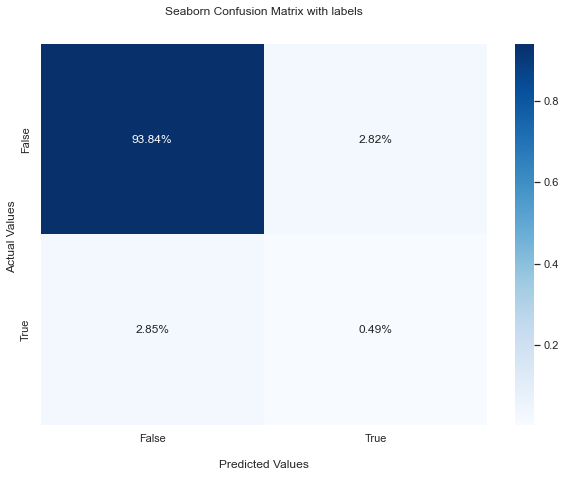

The accuracy score of the model is 94.33001107419712


In [54]:
# Print out the evaulation metrics
IsolationForest = metrics_model(model, z_iso, Y_test)

# MLP Classifier Implimentation 


In [55]:
from sklearn.neural_network import MLPClassifier

Y_train = training_set_target
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

# Fit data onto the model
clf.fit(X_train,Y_train)

Iteration 1, loss = 0.02444745
Iteration 2, loss = 0.00002036
Iteration 3, loss = 0.00001306
Iteration 4, loss = 0.00001120
Iteration 5, loss = 0.00001016
Iteration 6, loss = 0.00000893
Iteration 7, loss = 0.00000721
Iteration 8, loss = 0.00000527
Iteration 9, loss = 0.00000374
Iteration 10, loss = 0.00000275
Iteration 11, loss = 0.00000206
Iteration 12, loss = 0.00000148
Iteration 13, loss = 0.00000107
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=(6, 5), learning_rate_init=0.01,
              random_state=5, verbose=True)

The Classification report 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98    349170
           1       0.00      0.00      0.00     12030

    accuracy                           0.97    361200
   macro avg       0.48      0.50      0.49    361200
weighted avg       0.93      0.97      0.95    361200
 

The Confuction Matrix
 [[349170      0]
 [ 12030      0]] 



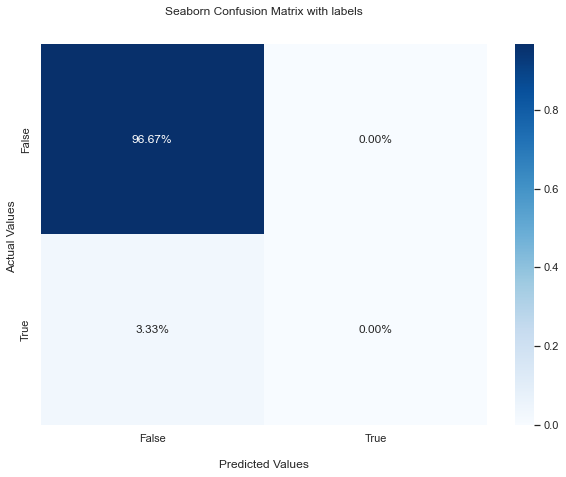

The accuracy score of the model is 96.66943521594685


In [56]:
# Make prediction on test dataset
ypred_clf=clf.predict(X_test)

MLPClassifier = metrics_model(model, ypred_clf, Y_test)

# AutoEncoders

In [57]:
#!pip install pyod
from pyod.models.auto_encoder import AutoEncoder
atcdr = AutoEncoder(contamination=0.05, hidden_neurons =[2, 2])
atcdr.fit(X_train)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                930       
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dropout_1 (Dropout)         (None, 30)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 62        
                                                                 
 dropout_2 (Dropout)         (None, 2)                 0         
                                                                 
 dense_3 (Dense)             (None, 2)                 6

AutoEncoder(batch_size=32, contamination=0.05, dropout_rate=0.2, epochs=100,
      hidden_activation='relu', hidden_neurons=[2, 2], l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x00000189E4BD9310>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=1)

In [58]:
# Training data
y_train_scores = atcdr.decision_function(X_train)
y_train_pred = atcdr.predict(X_train)

# Test data
y_test_scores = atcdr.decision_function(X_test)
y_test_pred = atcdr.predict(X_test) # outlier labels (0 or 1)

The Classification report 
               precision    recall  f1-score   support

           0       0.98      0.86      0.91    349170
           1       0.09      0.39      0.14     12030

    accuracy                           0.84    361200
   macro avg       0.53      0.63      0.53    361200
weighted avg       0.95      0.84      0.89    361200
 

The Confuction Matrix
 [[299199  49971]
 [  7291   4739]] 



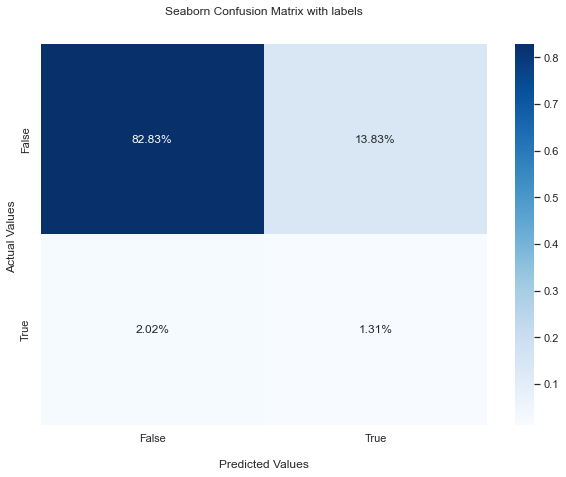

The accuracy score of the model is 84.14673311184939


In [59]:
AutoEncoders = metrics_model(atcdr, y_test_pred, Y_test)

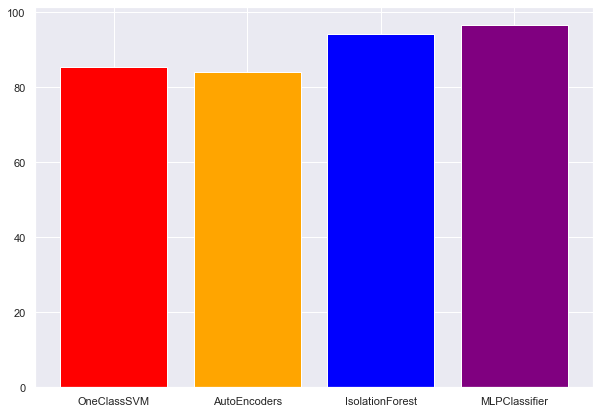

<Figure size 576x576 with 0 Axes>

In [69]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.figure(figsize=(8,8))
Classifiers = ['OneClassSVM', 'AutoEncoders', 'IsolationForest', 'MLPClassifier']
Accuracies = [OneClassSVM,AutoEncoders,IsolationForest,MLPClassifier]
colors_list = ['Red','Orange', 'Blue', 'Purple']
graph = ax.bar(Classifiers,Accuracies, color = colors_list)  
plt.show()

In [74]:
d = {'Classifier': Classifiers, 'Accuracy':Accuracies}

pd.DataFrame(index=None, data=d, columns = ['Classifier','Accuracy'])

Classifier   Accuracy
0      OneClassSVM  85.354928
1     AutoEncoders  84.146733
2  IsolationForest  94.330011
3    MLPClassifier  96.669435